# Coursework #2 AI for Sustainable Development

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset:
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development), please do not choose the climate action one related to brick kilns, as we will use it in class.
You can choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (e.g. that you are interested in). Please if you choose this option motivate the dataset's relationship to sustainable development. If the dataset is part of an online competition (e.g. in Kaggle, Zindi, etc), please make sure to include information that makes us discern what you have built, vs what was built from someone else (since in some cases participants of the competition submit tutorials, etc).

Please do NOT choose the same dataset that you used as part of a different coursework for a different module (which may be possible as the coursework is up to some extent open ended), as this would be considered self-plagiarism.

Once you have chosen your dataset we will ask you to do the following:
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning).
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. In either case, the pipeline you choose needs to be aligned with the task you defined before.
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Analyse and discuss some of the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use.

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can then submit this html/pdf file in moodle.

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.

<span style='color:red'> **Falls are the most common unintended injury among the elderly (65+) in the United States. It is estimated there are around 37 million falls nationally, resulting in around 40 thousand injury-related deaths [1]. Quick response and detection of falls is essential for mitigating harm. Vedrana Vidulin et al. propose a dataset and paper addressing fall detection using multi-agent systems [2]. This dataset and technology align directly with the UN Sustainable Development Goal #3, Good Health and Well Being [3].**

<span style='color:red'> **The dataset, found [here](https://archive.ics.uci.edu/dataset/196/localization+data+for+person+activity) measures several people wearing four tags which track location, two on ankles, one on a belt, and one on a chest. The dataset was created for a paper on multi-agent fall detection and prevention. In the paper, the authors discuss creating several agents: a random forest classifier agent, expert-knowledge agents, and meta-prediction agents. The random forest classifier agent was 72% accurate in detecting both true falls and false alarms. However, it was significantly better at detecting false alarms than true falls [2].**

<span style='color:red'> **Preprocessing steps and model design information was not provided, however the data is publicly available [4].**


### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions:
* What are the characteristics of your dataset? Do you see any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

You can use descriptive statistics here, figures/plots, etc.


In [1]:
# your code here!
# load relevant packages, load your dataset, start your analysis
# you can have as many code cells as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/AISD-CW2/original_full_data/localization+data+for+person+activity/ConfLongDemo_JSI.csv')
df.head()

,sequence_name,tag_identifier,timestamp,date,x_coord,y_coord,z_coord,activity
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking


In [3]:
df.describe()

,timestamp,x_coord,y_coord,z_coord
count,1.648600e+05,164860.000000,164860.000000,164860.000000
mean,6.337902e+17,2.811348,1.696877,0.418210
std,5.518139e+10,0.916226,0.473769,0.379125
min,6.337901e+17,-0.278698,-0.494428,-2.543609
25%,6.337901e+17,2.155791,1.350501,0.171623
50%,6.337902e+17,2.880423,1.634170,0.366285
75%,6.337902e+17,3.414097,2.039314,0.613117
max,6.337903e+17,5.758173,3.978097,2.606105


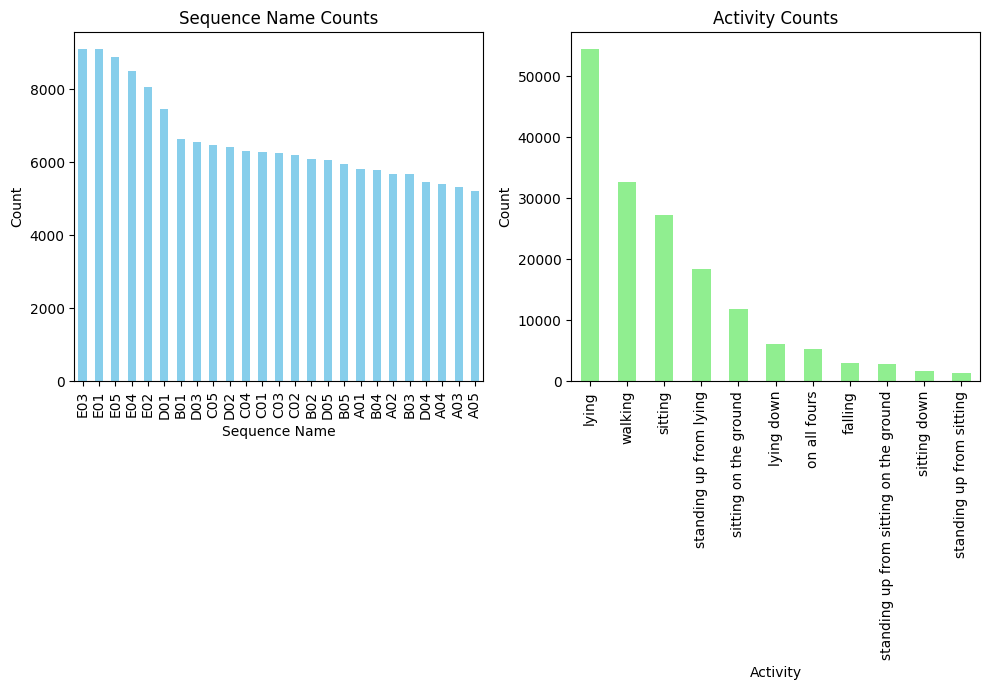

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

df['sequence_name'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sequence Name Counts')
axes[0].set_xlabel('Sequence Name')
axes[0].set_ylabel('Count')

df['activity'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Activity Counts')
axes[1].set_xlabel('Activity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
unique_sequences = df['sequence_name'].unique()

activity_df = pd.DataFrame()
index = 0
for sequence in unique_sequences:

    sequence_df = df[df['sequence_name'] == sequence]
    value_df = pd.DataFrame([sequence_df['activity'].value_counts().to_dict()], index=[index])
    value_df.insert(0, 'sequence_name', sequence)
    activity_df = pd.concat([activity_df, value_df], axis=0)
    index += 1

activity_df = activity_df.rename(columns={'activity': 'sequence_name'})
nan_count = activity_df.isna().sum()

print(nan_count)

sequence_name                             0
lying                                     0
sitting                                   0
walking                                   0
sitting on the ground                     1
standing up from lying                    0
on all fours                              0
lying down                                0
standing up from sitting on the ground    1
falling                                   0
sitting down                              0
standing up from sitting                  0
dtype: int64


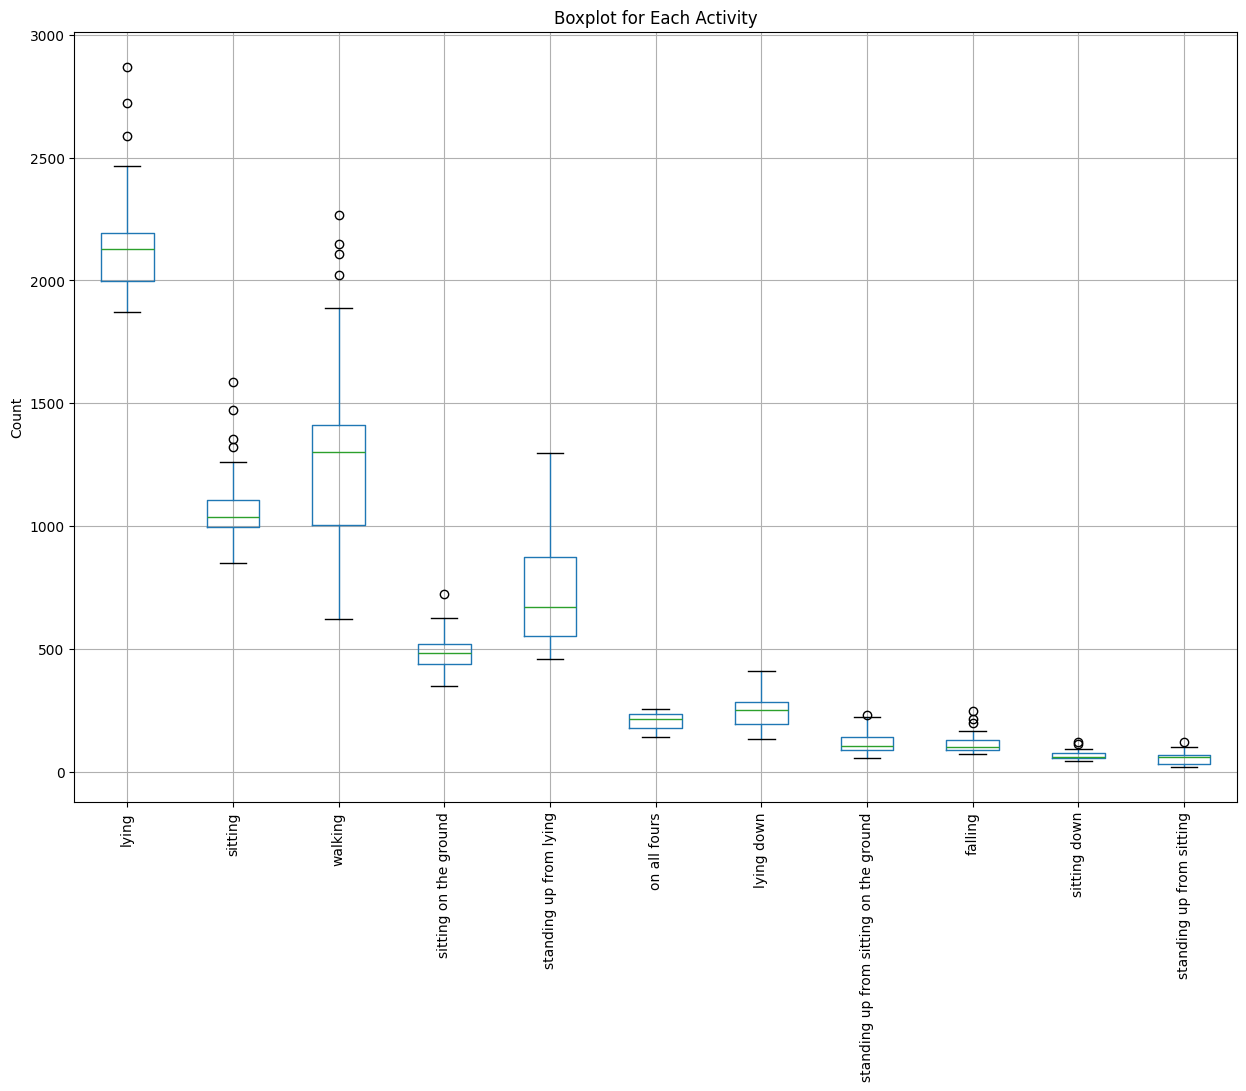

In [6]:
activity_df.describe()
activity_df.boxplot(column=['lying',
                            'sitting',
                            'walking',
                            'sitting on the ground',
                            'standing up from lying',
                            'on all fours',
                            'lying down',
                            'standing up from sitting on the ground',
                            'falling',
                            'sitting down',
                            'standing up from sitting'],
                            figsize=(15, 10))
plt.title('Boxplot for Each Activity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [7]:
unique_sequences = df['sequence_name'].unique()
sequence = unique_sequences[0]
sequence_data = df[df['sequence_name'] == sequence]

In [9]:
sequence_data['date'] = pd.to_datetime(sequence_data['date'], format='%d.%m.%Y %H:%M:%S:%f')

<ipython-input-9-a56ca2bfc7c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence_data['date'] = pd.to_datetime(sequence_data['date'], format='%d.%m.%Y %H:%M:%S:%f')


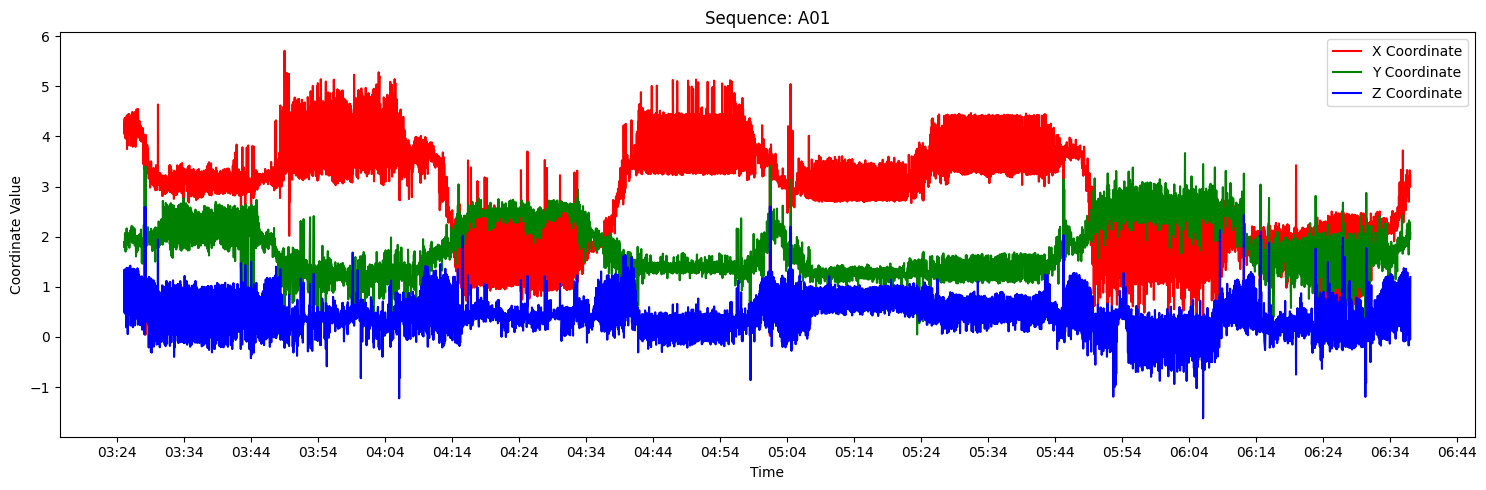

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(sequence_data['date'], sequence_data['x_coord'], label='X Coordinate', color='r')
ax.plot(sequence_data['date'], sequence_data['y_coord'], label='Y Coordinate', color='g')
ax.plot(sequence_data['date'], sequence_data['z_coord'], label='Z Coordinate', color='b')
ax.set_title(f'Sequence: {sequence}')
ax.set_xlabel('Time')
ax.set_ylabel('Coordinate Value')
ax.legend()

locator = mdates.SecondLocator(interval=10)
formatter = mdates.DateFormatter('%M:%S')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


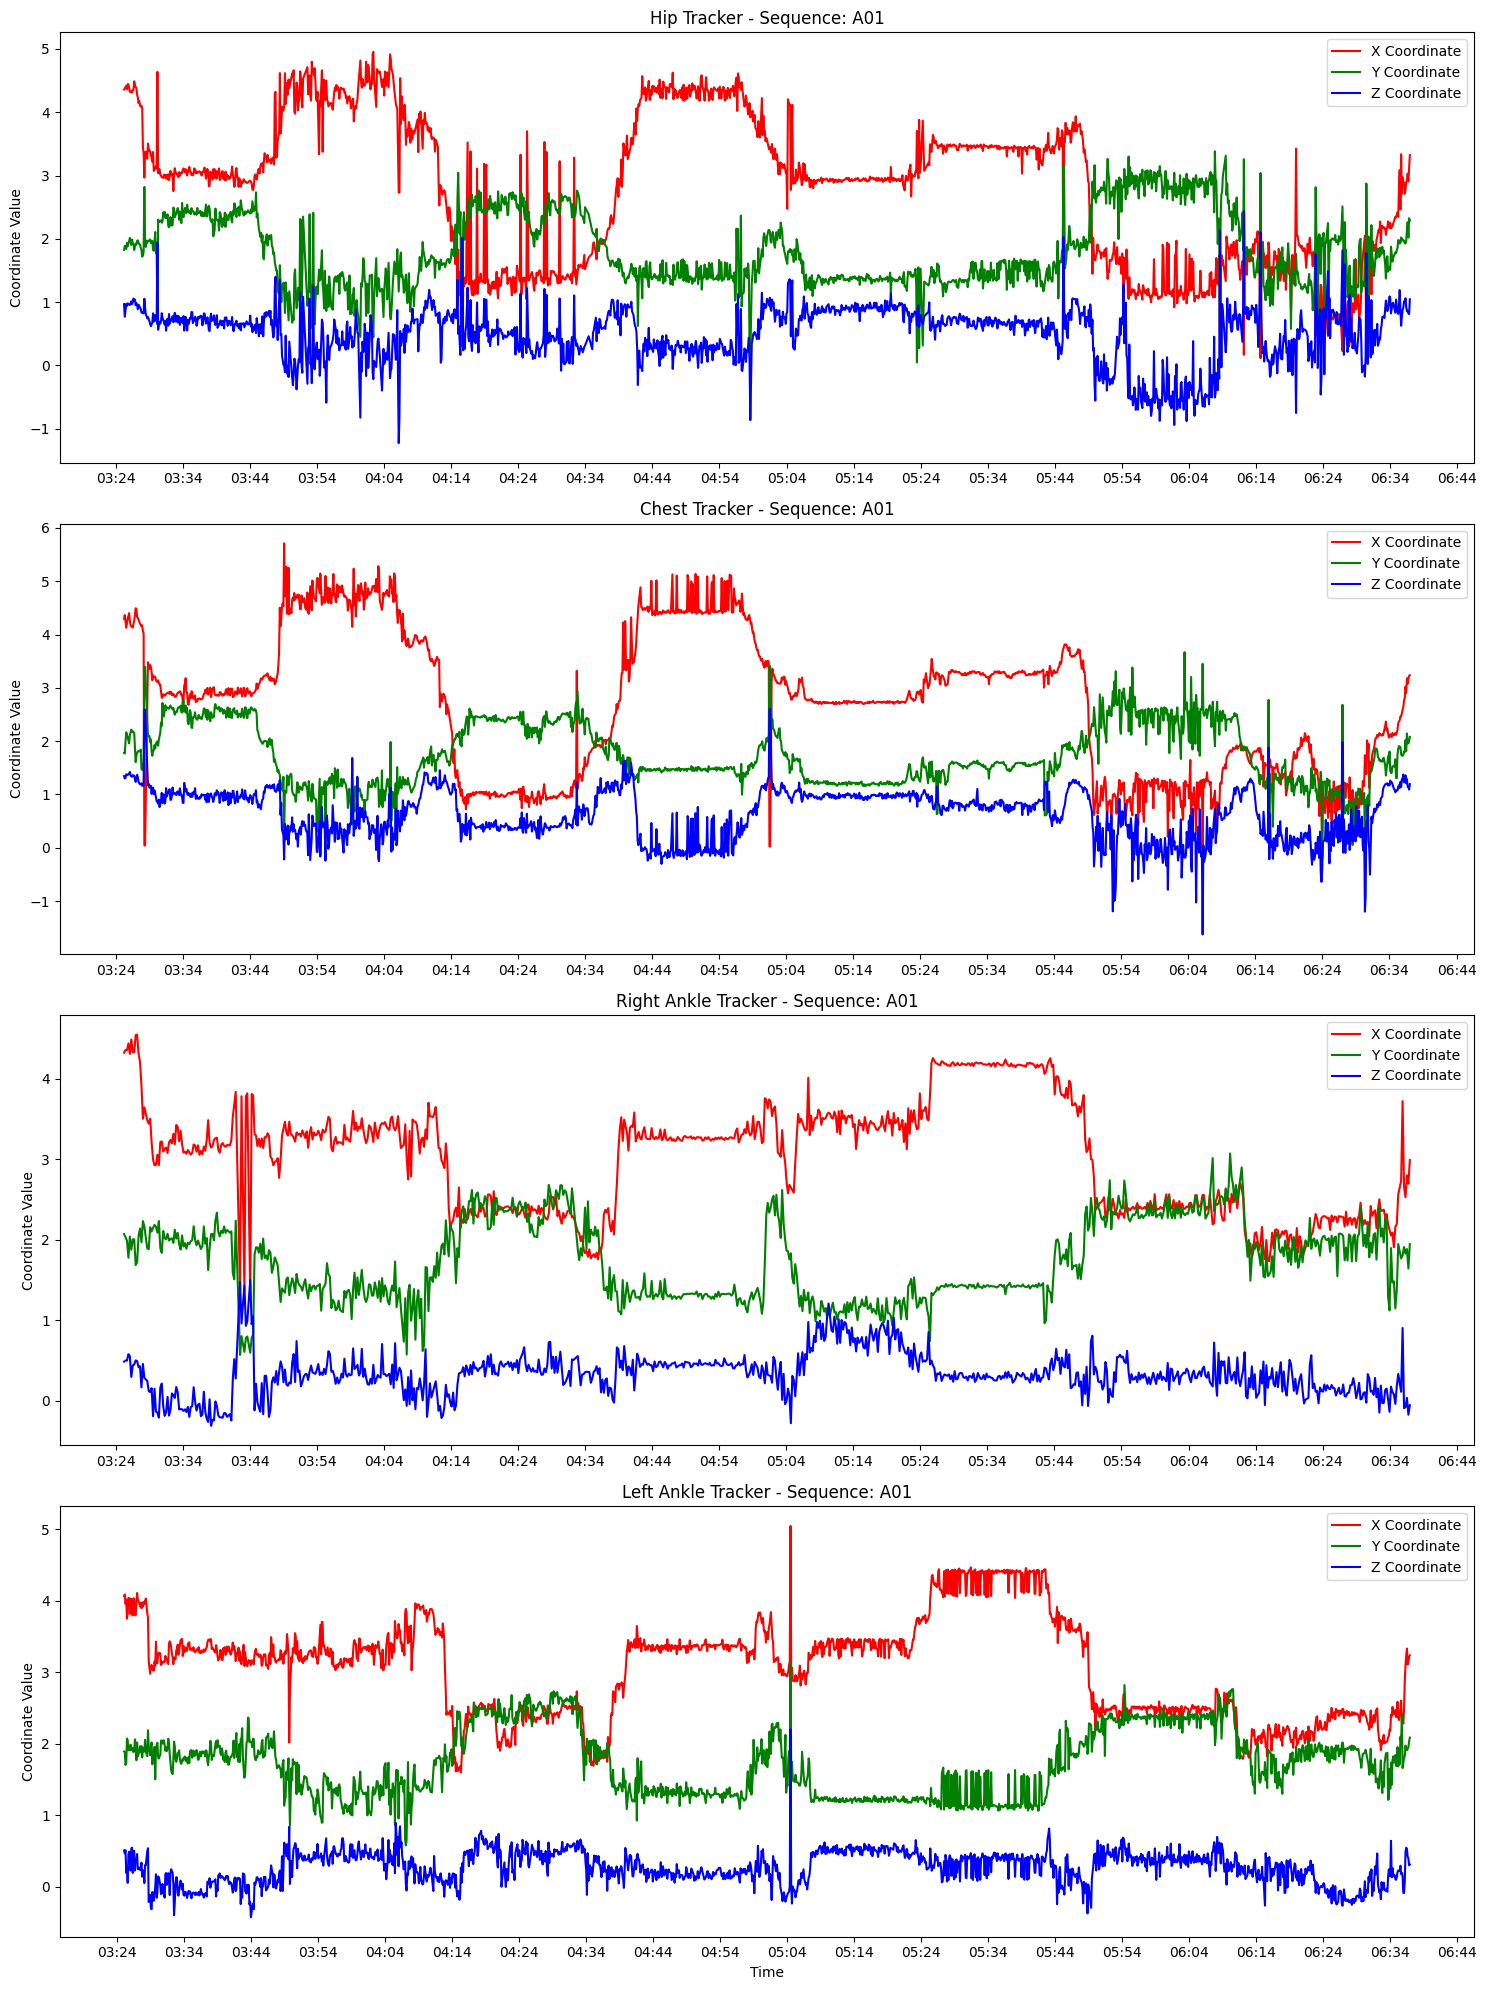

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

tag_identifiers = ["020-000-032-221", "020-000-033-111", "010-000-030-096", "010-000-024-033"]
titles = ["Hip Tracker", "Chest Tracker", "Right Ankle Tracker", "Left Ankle Tracker"]

for ax, tag_id, title in zip(axes, tag_identifiers, titles):
    tracker_df = sequence_data[sequence_data['tag_identifier'] == tag_id]
    ax.plot(tracker_df['date'], tracker_df['x_coord'], label='X Coordinate', color='r')
    ax.plot(tracker_df['date'], tracker_df['y_coord'], label='Y Coordinate', color='g')
    ax.plot(tracker_df['date'], tracker_df['z_coord'], label='Z Coordinate', color='b')
    ax.set_title(f'{title} - Sequence: {sequence}')
    ax.set_ylabel('Coordinate Value')
    ax.legend()

    locator = mdates.SecondLocator(interval=10)
    formatter = mdates.DateFormatter('%M:%S')
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

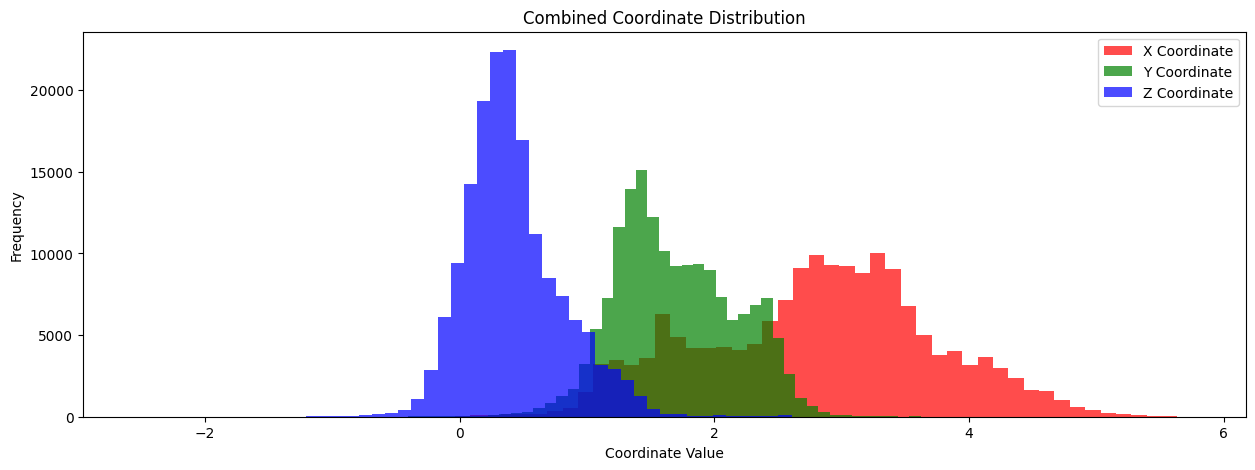

In [12]:
def plot_combined_coordinate_dist(x_coord, y_coord, z_coord):
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.hist(x_coord, bins=50, color='r', alpha=0.7, label='X Coordinate')
    ax.hist(y_coord, bins=50, color='g', alpha=0.7, label='Y Coordinate')
    ax.hist(z_coord, bins=50, color='b', alpha=0.7, label='Z Coordinate')
    ax.set_title('Combined Coordinate Distribution')
    ax.set_xlabel('Coordinate Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.show()

plot_combined_coordinate_dist(df['x_coord'], df['y_coord'], df['z_coord'])

<span style='color:red'> **There are a total of 20 sequences, and 11 possible activities a participant can be doing**

<span style='color:red'> **As shown by the “Sequence Name Counts” chart, while there are around 5500 or more data points collected for each sequence, there are disproportionate amounts of data between each experiment and trial. I do not expect this to cause any severe issues, however I will need to account for the bias of each sequence while training.**

<span style='color:red'> **In the “Activity Counts” chart, we can see for all sequences that the majority of time was spent lying, walking and sitting. Very little time is spent falling, sitting down, and standing up from sitting. This is expected as falling is generally an instantaneous action, and once someone falls, they may spend a lot of time on the ground before they have the capacity to stand again.**

<span style='color:red'> **As shown by the “Boxplot for Each Activity” chart, there are not very many outliers for each activity per sequence. However, there are two cases where a sequence had no data for “sitting on the ground” or “standing up from sitting on the ground.”**

<span style='color:red'> **I was interested in seeing the x, y, and z data plotted over time, so for sequence A01, I plotted the overall data and the data specific to each tag.**

<span style='color:red'> **From the overall data, the main insights I gathered are that the coordinates range from around -1 to 6. Also, the A01 sequence lasted for about three minutes.**

<span style='color:red'> **The overall data is quite clustered, however there are some insights available from the individual tag data.**

<span style='color:red'> **Specifically, the “Left Ankle Tracker - Sequence: A01” shows a dramatic spike for all coordinates around 05:04. There are two potential causes for this: 1) the participant kicked their leg up to attempt to trigger a false alarm, 2) the tag gave a faulty reading. I believe this can be attributed to a faulty reading, as all three coordinates jump by the same amount at exactly the same time. It would be difficult or impossible to recreate this through movement alone.**

<span style='color:red'> **The coordinates generally follow a normal distribution, however each coordinate feature has a different mean and standard deviation.**

<span style='color:red'> **There are several preprocessing steps I will take to prepare the data for training a machine learning model. Specifically, standard scaling, implementing a sliding window, resampling, and one-hot encoding categorical values.**

### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.

<span style='color:red'> **The dataset provides detailed information of a person's location within space, and the bodily activity they are engaged in. I believe this dataset could be best used to classify a person’s current state, and specifically note if a person has fallen.**

<span style='color:red'> **The main evaluation metrics I will track are cross entropy loss, accuracy, and the F-score for each activity. I chose cross entropy loss as this is a multi-class classification problem. While accuracy is important for this task, precision and recall are also useful metrics. I use the F-score to measure the overall strength of the model for each activity as it provides insight into if the model would be reliable in practice.**

<span style='color:red'> **The model I have chosen for this task is a long short-term memory (LSTM) RNN. The LSTM is a special type of RNN which is useful for remembering information over a long period of time. In this case, it is important to remember a sudden drop in the z coordinate (indicating a fall), as it can provide information about the person’s current state. AS the data is sequential, an RNN is best suited for this task.**

<span style='color:red'> **I will compare the model accuracy and F-score to a random forest classifier, which utilizes decision trees to classify an output given data. The authors of the dataset’s paper implement random forest classification for their machine learning model, achieving an overall accuracy of 72%. The preprocessing and model implementation steps were not provided.**

<span style='color:red'> **One of the biggest issues of the dataset is class imbalance. When a person falls, there is only a brief window of being in a “falling” state. Almost immediately, the person would be in a “lying” state after falling. This is apparent in the dataset as there are significantly less data points from quicker activities such as falling or sitting down, and many more from long term activities such as lying or walking. To overcome the lack of data for quicker activities, I will implement a RandomOverSampler, which chooses random samples from minority classes [6]. This approach will allow the model to train on more samples of the underrepresented data. I will also implement class weights for the cross entropy loss, which will also ideally help training.**


### Design and build an ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now an ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model?

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so.
***


**Preprocessing**

In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm
import random

In [ ]:
mapping = {
    '010-000-024-033': 'LEFT_ANKLE',
    '010-000-030-096': 'RIGHT_ANKLE',
    '020-000-033-111': 'CHEST',
    '020-000-032-221': 'BELT'
}

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
random_state = 42

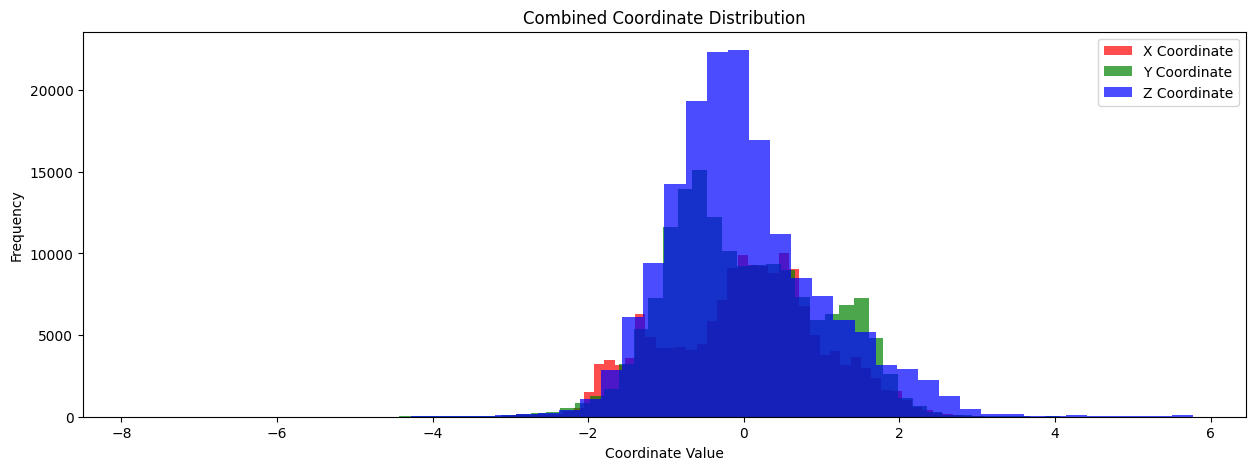

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AISD-CW2/original_full_data/localization+data+for+person+activity/ConfLongDemo_JSI.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S:%f')
df = df.sort_values(by=['sequence_name', 'date'])

df['tag_identifier'] = df['tag_identifier'].replace(mapping)

scaler = StandardScaler()
df[['x_coord', 'y_coord', 'z_coord']] = scaler.fit_transform(df[['x_coord', 'y_coord', 'z_coord']])

plot_combined_coordinate_dist(df['x_coord'], df['y_coord'], df['z_coord'])

In [ ]:
def sliding_window(data, window_size, step_size):
    windows = []
    labels = []
    for i in range(0, len(data) - window_size, step_size):
        windows.append(data.iloc[i : i + window_size, :-1].values)
        labels.append(data.iloc[i + window_size - 1, -1])
    return np.array(windows), np.array(labels)

In [ ]:
df = df.drop(columns=['date', 'timestamp', 'sequence_name'])
encoded_tags = encoder.fit_transform(df[['tag_identifier']])
encoded_df = pd.DataFrame(encoded_tags, columns=encoder.get_feature_names_out(['tag_identifier']))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop('tag_identifier', axis=1)

cols = list(df.columns)
cols.remove('activity')
cols.append('activity')

df = df[cols]

window_size = 20
step_size = 10

X, y = [], []
X_seq, y_seq = sliding_window(df, window_size=window_size, step_size=step_size)
X.append(X_seq)
y.append(y_seq)

X = np.concatenate(X)
y = np.concatenate(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_flat = X_train.reshape((X_train.shape[0], -1))
ros = RandomOverSampler(random_state=random_state)

X_resampled, y_resampled = ros.fit_resample(X_flat, y_train)
X_resampled = X_resampled.reshape((-1, window_size, X_train.shape[2]))

X_train, y_train = X_resampled, y_resampled

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

In [ ]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
val_dataset = torch.utils.data.TensorDataset(X_val, y_val)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

In [ ]:
y_train_labels = np.argmax(y_train.numpy(), axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

<span style='color:red'> **LSTMs take data in the format of (samples, time steps, features). To format the data to this shape, I first used standard scaling to rescale the data. The standard scaler was the best choice as each coordinate generally followed a normal distribution. By using the standard scaler, the coordinates now have roughly the same mean and standard deviation.**

<span style='color:red'> **Next, I dropped columns I did not believe would benefit the model, and I one-hot encoded the tag_identifier column, which describes which sensor the data came from. I then added in a sliding window, which groups the data into overlapping windows which are fed to the LSTM. A sliding window is useful in an LSTM as it reduces complexity and allows the model to capture longer temporal dependencies.**

<span style='color:red'> **After the sliding window, I split the data into training, testing, and validation splits. I used a random oversampler to deal with limited data for quick activities, as described in *Task and Evaluation***

<span style='color:red'> **Lastly, I one hot encoded the target variables for each split and converted the data into tensors. These tensors were converted into torch TensorDatasets and passed through DataLoaders to prepare for training.**

**Model Design**

In [ ]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.5):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dropout = torch.nn.Dropout(dropout_rate)
        self.fc = torch.nn.Linear(hidden_size, num_classes)
        self.batch_norm = torch.nn.BatchNorm1d(hidden_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.dropout(out[:, -1, :])
        out = self.batch_norm(out)
        out = self.fc(out)
        return out

In [ ]:
def train(model, device, train_loader, val_loader, optimizer, criterion, n_epochs):
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for i, (features, labels) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{n_epochs}")):
            features = features.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        all_labels = []
        all_predictions = []
        with torch.no_grad():
            for features, labels in val_loader:
                features = features.to(device)
                labels = labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == torch.argmax(labels, dim=1)).sum().item()
                all_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())

            val_losses.append(val_loss / len(val_loader))
            val_accuracies.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.2f}%")
        scheduler.step(val_losses[-1])
    return train_losses, train_accuracies, val_losses, val_accuracies, all_labels, all_predictions

In [ ]:
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for features, labels in test_loader:
            features = features.to(device)
            labels = labels.to(device)
            outputs = model(features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()
            all_labels.extend(torch.argmax(labels, dim=1).cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    return test_loss / len(test_loader), 100 * correct / total, all_labels, all_predictions

In [ ]:
def plot_confusion_matrix(all_labels, all_predictions, class_names):
    cm = confusion_matrix(all_labels, all_predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
def plot_loss_accuracy(train_losses, train_accuracies, val_losses, val_accuracies):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].plot(train_losses, label='Train Loss', color='b')
    axes[0].plot(val_losses, label='Validation Loss', color='r')
    axes[0].set_title('Loss vs Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(train_accuracies, label='Train Accuracy', color='b')
    axes[1].plot(val_accuracies, label='Validation Accuracy', color='r')
    axes[1].set_title('Accuracy vs Epoch')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def calculate_f1_per_label(test_labels, test_predictions, label_names):

    test_labels = np.array(test_labels)
    test_predictions = np.array(test_predictions)

    if test_labels.ndim == 1:
        num_labels = len(label_names)
        test_labels_onehot = np.zeros((len(test_labels), num_labels), dtype=int)
        for i, label_index in enumerate(test_labels):
            test_labels_onehot[i, label_index] = 1
        test_labels = test_labels_onehot

    if test_predictions.ndim == 1:
        num_labels = len(label_names)
        test_predictions_onehot = np.zeros((len(test_predictions), num_labels), dtype=int)
        for i, label_index in enumerate(test_predictions):
            test_predictions_onehot[i, label_index] = 1
        test_predictions = test_predictions_onehot


    f1_scores = {}
    for i, label_name in enumerate(label_names):
        f1 = f1_score(test_labels[:, i], test_predictions[:, i])
        f1_scores[label_name] = f1

    return f1_scores

<span style='color:red'> **My model consisted of an LSTM layer, dropout, and batch normalization. I opted to use dropout as I noticed my model was prone to overfitting. However, as seen in *Experimental Analysis*, the best parameters found used a dropout rate of 0.0. I also implemented batch normalization, which stabilizes the input for each layer within the network [7].**

<span style='color:red'> **My train and test loops are fairly straightforward. One decision I made was to return the labels and predictions of my validation test. I used this to plot a confusion matrix and calculate the f-score of my data, which is generally necessary with time series classification problems.**


**Training**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMModel(input_size=7, hidden_size=128, num_layers=4, num_classes=11, dropout_rate=0.5)
model.to(device)

criterion = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

n_epochs = 25

train_losses, train_accuracies, val_losses, val_accuracies, all_labels, all_predictions = train(model, device, train_loader, val_loader, optimizer, criterion, n_epochs)


Training Epoch 1/25: 100%|██████████| 600/600 [00:03<00:00, 154.66it/s]


Epoch 1/25, Train Loss: 1.5319, Train Accuracy: 43.34%, Validation Loss: 0.9643, Validation Accuracy: 65.70%


Training Epoch 2/25: 100%|██████████| 600/600 [00:02<00:00, 219.10it/s]


Epoch 2/25, Train Loss: 0.9514, Train Accuracy: 67.26%, Validation Loss: 0.6949, Validation Accuracy: 75.45%


Training Epoch 3/25: 100%|██████████| 600/600 [00:02<00:00, 219.29it/s]


Epoch 3/25, Train Loss: 0.6214, Train Accuracy: 79.18%, Validation Loss: 0.4877, Validation Accuracy: 80.91%


Training Epoch 4/25: 100%|██████████| 600/600 [00:02<00:00, 219.85it/s]


Epoch 4/25, Train Loss: 0.4735, Train Accuracy: 84.21%, Validation Loss: 0.3987, Validation Accuracy: 86.77%


Training Epoch 5/25: 100%|██████████| 600/600 [00:03<00:00, 150.28it/s]


Epoch 5/25, Train Loss: 0.4023, Train Accuracy: 86.95%, Validation Loss: 0.3628, Validation Accuracy: 88.55%


Training Epoch 6/25: 100%|██████████| 600/600 [00:02<00:00, 217.65it/s]


Epoch 6/25, Train Loss: 0.3320, Train Accuracy: 89.09%, Validation Loss: 0.2668, Validation Accuracy: 90.96%


Training Epoch 7/25: 100%|██████████| 600/600 [00:02<00:00, 217.08it/s]


Epoch 7/25, Train Loss: 0.3017, Train Accuracy: 90.44%, Validation Loss: 0.2574, Validation Accuracy: 91.67%


Training Epoch 8/25: 100%|██████████| 600/600 [00:02<00:00, 215.15it/s]


Epoch 8/25, Train Loss: 0.2689, Train Accuracy: 91.65%, Validation Loss: 0.2103, Validation Accuracy: 93.28%


Training Epoch 9/25: 100%|██████████| 600/600 [00:03<00:00, 152.55it/s]


Epoch 9/25, Train Loss: 0.2591, Train Accuracy: 92.02%, Validation Loss: 0.2641, Validation Accuracy: 92.26%


Training Epoch 10/25: 100%|██████████| 600/600 [00:02<00:00, 215.48it/s]


Epoch 10/25, Train Loss: 0.2424, Train Accuracy: 92.67%, Validation Loss: 0.1903, Validation Accuracy: 93.91%


Training Epoch 11/25: 100%|██████████| 600/600 [00:02<00:00, 216.17it/s]


Epoch 11/25, Train Loss: 0.2336, Train Accuracy: 92.87%, Validation Loss: 0.2050, Validation Accuracy: 93.72%


Training Epoch 12/25: 100%|██████████| 600/600 [00:02<00:00, 216.99it/s]


Epoch 12/25, Train Loss: 0.2092, Train Accuracy: 93.70%, Validation Loss: 0.2253, Validation Accuracy: 92.82%


Training Epoch 13/25: 100%|██████████| 600/600 [00:03<00:00, 153.93it/s]


Epoch 13/25, Train Loss: 0.1833, Train Accuracy: 94.39%, Validation Loss: 0.1688, Validation Accuracy: 94.41%


Training Epoch 14/25: 100%|██████████| 600/600 [00:02<00:00, 212.04it/s]


Epoch 14/25, Train Loss: 0.1761, Train Accuracy: 94.85%, Validation Loss: 0.1635, Validation Accuracy: 94.61%


Training Epoch 15/25: 100%|██████████| 600/600 [00:02<00:00, 216.83it/s]


Epoch 15/25, Train Loss: 0.1728, Train Accuracy: 94.79%, Validation Loss: 0.1611, Validation Accuracy: 94.99%


Training Epoch 16/25: 100%|██████████| 600/600 [00:02<00:00, 217.71it/s]


Epoch 16/25, Train Loss: 0.1648, Train Accuracy: 94.92%, Validation Loss: 0.2168, Validation Accuracy: 93.49%


Training Epoch 17/25: 100%|██████████| 600/600 [00:03<00:00, 152.21it/s]


Epoch 17/25, Train Loss: 0.1567, Train Accuracy: 95.36%, Validation Loss: 0.1524, Validation Accuracy: 95.43%


Training Epoch 18/25: 100%|██████████| 600/600 [00:02<00:00, 214.71it/s]


Epoch 18/25, Train Loss: 0.1518, Train Accuracy: 95.57%, Validation Loss: 0.1529, Validation Accuracy: 95.11%


Training Epoch 19/25: 100%|██████████| 600/600 [00:02<00:00, 214.46it/s]


Epoch 19/25, Train Loss: 0.1559, Train Accuracy: 95.41%, Validation Loss: 0.1197, Validation Accuracy: 96.55%


Training Epoch 20/25: 100%|██████████| 600/600 [00:02<00:00, 213.55it/s]


Epoch 20/25, Train Loss: 0.1376, Train Accuracy: 95.88%, Validation Loss: 0.1634, Validation Accuracy: 95.15%


Training Epoch 21/25: 100%|██████████| 600/600 [00:03<00:00, 153.39it/s]


Epoch 21/25, Train Loss: 0.1347, Train Accuracy: 96.13%, Validation Loss: 0.1519, Validation Accuracy: 95.58%


Training Epoch 22/25: 100%|██████████| 600/600 [00:02<00:00, 219.87it/s]


Epoch 22/25, Train Loss: 0.1328, Train Accuracy: 96.05%, Validation Loss: 0.1174, Validation Accuracy: 96.66%


Training Epoch 23/25: 100%|██████████| 600/600 [00:02<00:00, 219.39it/s]


Epoch 23/25, Train Loss: 0.1379, Train Accuracy: 95.94%, Validation Loss: 0.1272, Validation Accuracy: 96.21%


Training Epoch 24/25: 100%|██████████| 600/600 [00:02<00:00, 220.52it/s]


Epoch 24/25, Train Loss: 0.1314, Train Accuracy: 96.20%, Validation Loss: 0.1438, Validation Accuracy: 95.65%


Training Epoch 25/25: 100%|██████████| 600/600 [00:03<00:00, 164.27it/s]


Epoch 25/25, Train Loss: 0.1155, Train Accuracy: 96.75%, Validation Loss: 0.1250, Validation Accuracy: 96.58%


<span style='color:red'> **As discussed previously, Cross Entropy Loss is the best loss function for this task, as it considers multi-class outputs. I tried both the stochastic gradient descent (SGD) and Adam optimizers, and decided to use Adam with a learning rate of 0.001 and weight decay of 1e-5. These values were landed on after multiple tests as it generally provided the best results. I also implemented a learning rate scheduler as I noticed my model was learning too quickly and would overfit.**

**Training and Validation Metrics and Plots**

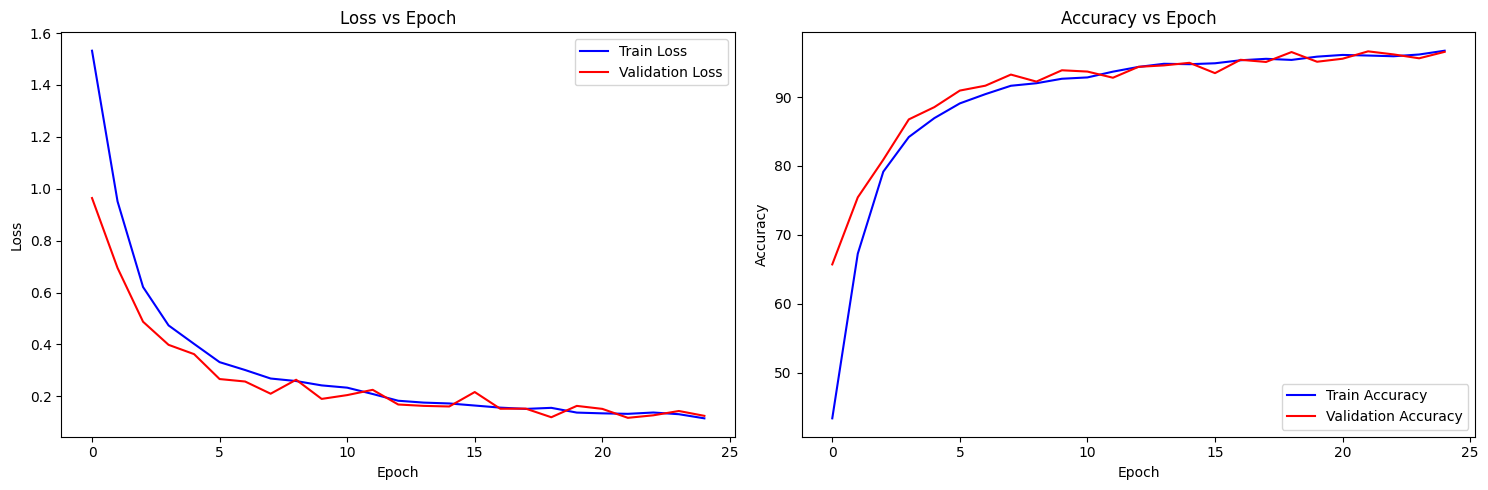

In [ ]:
plot_loss_accuracy(train_losses, train_accuracies, val_losses, val_accuracies)

In [ ]:
f1_scores = calculate_f1_per_label(all_labels, all_predictions, encoder.categories_[0])
for label, f1 in f1_scores.items():
    print(f"F1 Score for {label}: {f1:.2f}")

print(f"\nOverall F1 Score: {f1_score(all_labels, all_predictions, average='weighted'):.2f}")

F1 Score for falling: 0.99
F1 Score for lying: 0.92
F1 Score for lying down: 0.93
F1 Score for on all fours: 0.99
F1 Score for sitting: 0.98
F1 Score for sitting down: 0.99
F1 Score for sitting on the ground: 1.00
F1 Score for standing up from lying: 0.88
F1 Score for standing up from sitting: 0.99
F1 Score for standing up from sitting on the ground: 1.00
F1 Score for walking: 0.95

Overall F1 Score: 0.97


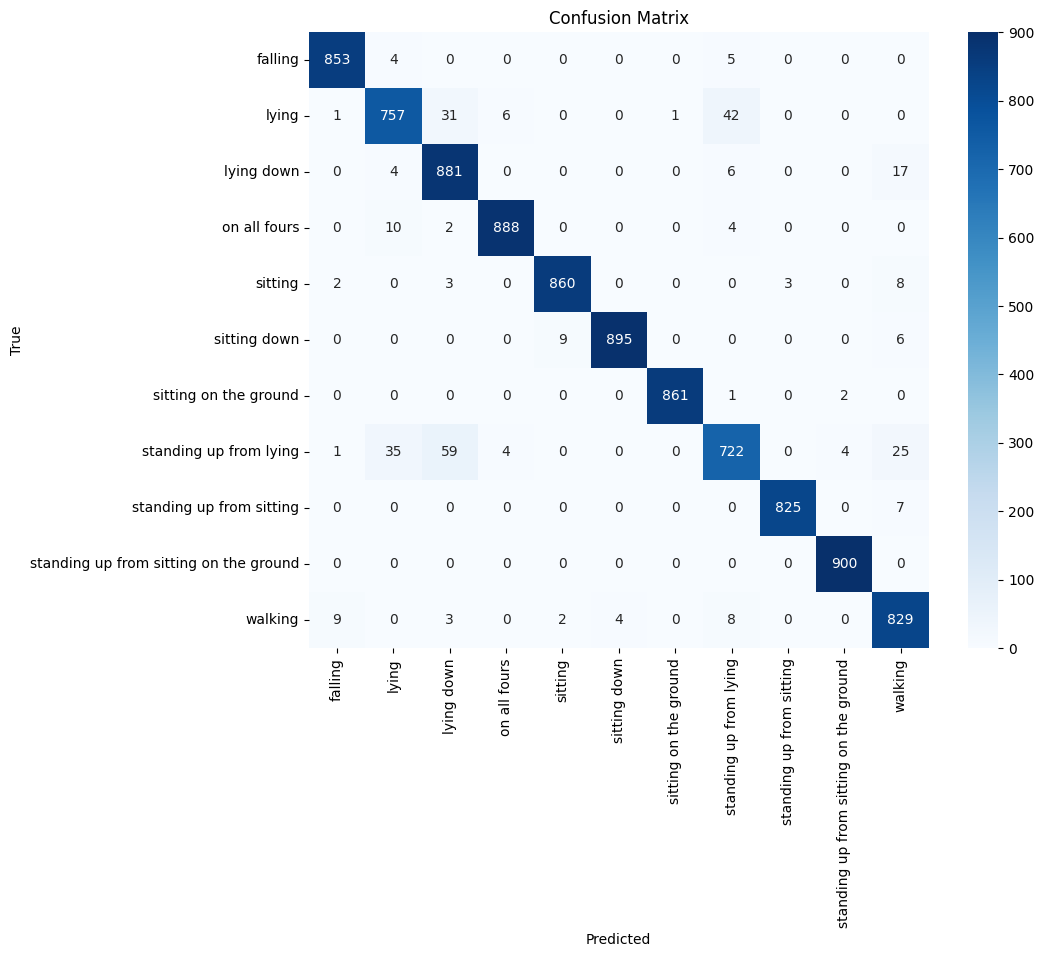

In [ ]:
plot_confusion_matrix(all_labels, all_predictions, encoder.categories_[0])

<span style='color:red'> **Training and validation generally learn the data quite well, and the final validation test receives an F-score of 0.97, with all activities being in a similar range. This can be visualized by the confusion matrix, showing very high accuracy for all data points.**

**Testing**

In [ ]:
test_loss, test_accuracy, test_labels, test_predictions = test(model, device, test_loader, criterion)

In [ ]:
print(f'Test Loss: {test_loss}', f'\nTest Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.5370587064669683 
Test Accuracy: 86.68%


<span style='color:red'> **The test dataset does not include oversampled values, so it is significantly smaller than the training and validation sets. As a result, the loss and accuracy tend to be worse than training and validation.**

**Testing Metrics and Plots**

In [ ]:
f1_scores = calculate_f1_per_label(test_labels, test_predictions, encoder.categories_[0])
for label, f1 in f1_scores.items():
    print(f"F1 Score for {label}: {f1:.2f}")


print(f"\nOverall F1 Score: {f1_score(test_labels, test_predictions, average='weighted'):.2f}")

F1 Score for falling: 0.58
F1 Score for lying: 0.94
F1 Score for lying down: 0.62
F1 Score for on all fours: 0.79
F1 Score for sitting: 0.97
F1 Score for sitting down: 0.42
F1 Score for sitting on the ground: 0.97
F1 Score for standing up from lying: 0.73
F1 Score for standing up from sitting: 0.50
F1 Score for standing up from sitting on the ground: 0.81
F1 Score for walking: 0.93

Overall F1 Score: 0.89


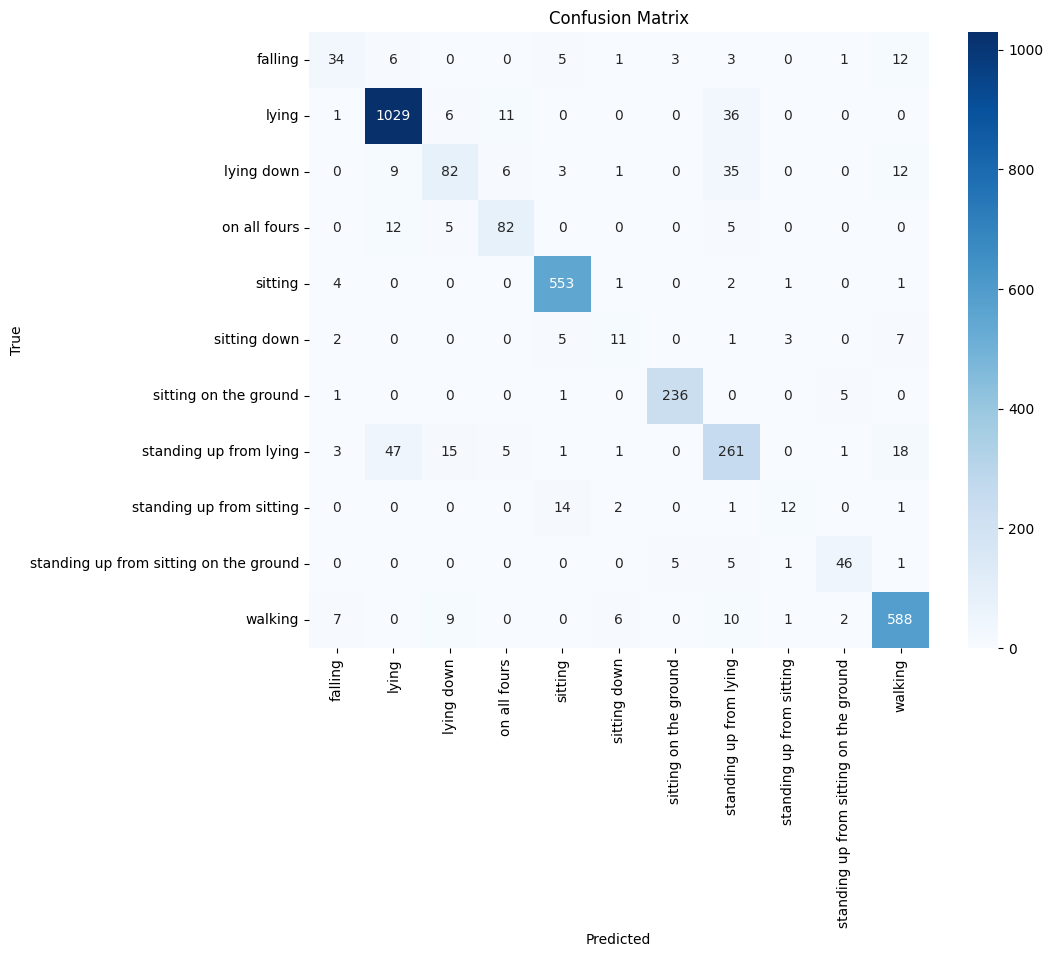

In [ ]:
plot_confusion_matrix(test_labels, test_predictions, encoder.categories_[0])

<span style='color:red'> **The overall F-score of the test dataset is lower than the training and validation set by about 8%. This is likely due to the data being oversampled in training and validation, but not in testing. Ultimately, however, the model does perform well in every category, especially walking, sitting, and lying. I attribute this to these categories having more data available compared to things like falling and sitting down.**

**Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust hyperparameters

X_train_rf = X_train.reshape(X_train.shape[0], -1)
X_test_rf = X_test.reshape(X_test.shape[0], -1)
X_val_rf = X_val.reshape(X_val.shape[0], -1)

y_train_rf = np.argmax(y_train.numpy(), axis=1)
y_test_rf = np.argmax(y_test.numpy(), axis=1)
y_val_rf = np.argmax(y_val.numpy(), axis=1)

rf_classifier.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_classifier.predict(X_test_rf)

accuracy = accuracy_score(y_test_rf, y_pred_rf)
f1_score = f1_score(y_test_rf, y_pred_rf, average='weighted')
print(f"Random Forest Accuracy: {accuracy}")
print(f"Random Forest F1 Score: {f1_score}")

Random Forest Accuracy: 0.7810130421595389
Random Forest F1 Score: 0.7581044980052651


<span style='color:red'> **The baseline I have chosen for this task is a random forest classifier, which is the same architecture the authors in the original paper used. In their paper, they achieved an overall accuracy of 72%. Unfortunately, they do not provide code to replicate this. I recreated a random forest classifier for this task, which achieved an overall accuracy of 78% and a F-score of 0.75. Discrepancies in preprocessing likely account for the variation between the paper’s accuracy and mine.**

<span style='color:red'> **The LSTM model performs significantly better than the random forest classifier.**

| Metric | Output |
| --- | --- |
| LSTM Test Accuracy | 0.87 |
|Random Forest Accuracy | 0.78 |
| LSTM Test F-Score | 0.89 |
| Random Forest F-Score | 0.76 |

<span style='color:red'> **There is, however, clear overfitting on the training and validation sets compared to the testing set. The strength of the LSTM is it considers past data to make current predictions. Random forest does not incorporate past information into current predictions. The downside of an LSTM is it has high computational costs and generally requires larger datasets. I believe the LSTM could achieve high accuracy if more data was provided, specifically for the quick actions (falling, standing up, sitting down).**

### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines (yours or from the literature). Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


**Hyperparameter Tuning**

In [ ]:
def tune_hyperparams(hidden_size=[128, 256], num_layers=[3, 4], dropout_rate=[0.2, 0.5]):
    best_accuracy = 0
    best_params = {}

    n_epochs = 25

    for hs in hidden_size:
        for nl in num_layers:
            for dr in dropout_rate:

                model = LSTMModel(input_size=7, hidden_size=hs, num_layers=nl, num_classes=11, dropout_rate=dr).to(device)

                criterion = torch.nn.CrossEntropyLoss()
                optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
                scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

                train_losses, train_accuracies, val_losses, val_accuracies, all_labels, all_predictions = train(model, device, train_loader, val_loader, optimizer, criterion, n_epochs)
                test_loss, test_accuracy, _, _ = test(model, device, test_loader, criterion)
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params['hidden_size'] = hs
                    best_params['num_layers'] = nl
                    best_params['dropout_rate'] = dr

                print(f"Hidden Size: {hs}, Num Layers: {nl}, Dropout Rate: {dr}, Test Accuracy: {test_accuracy:.2f}%")

    return best_params

In [ ]:
optimal_params = tune_hyperparams()

Training Epoch 1/25: 100%|██████████| 600/600 [00:04<00:00, 143.54it/s]


Epoch 1/25, Train Loss: 1.2507, Train Accuracy: 54.13%, Validation Loss: 0.9694, Validation Accuracy: 64.04%


Training Epoch 2/25: 100%|██████████| 600/600 [00:02<00:00, 243.97it/s]


Epoch 2/25, Train Loss: 0.8561, Train Accuracy: 67.90%, Validation Loss: 0.7669, Validation Accuracy: 71.16%


Training Epoch 3/25: 100%|██████████| 600/600 [00:02<00:00, 242.24it/s]


Epoch 3/25, Train Loss: 0.6547, Train Accuracy: 75.59%, Validation Loss: 0.5131, Validation Accuracy: 80.75%


Training Epoch 4/25: 100%|██████████| 600/600 [00:02<00:00, 241.33it/s]


Epoch 4/25, Train Loss: 0.4993, Train Accuracy: 81.68%, Validation Loss: 0.4224, Validation Accuracy: 84.86%


Training Epoch 5/25: 100%|██████████| 600/600 [00:03<00:00, 168.73it/s]


Epoch 5/25, Train Loss: 0.3923, Train Accuracy: 86.03%, Validation Loss: 0.3502, Validation Accuracy: 87.40%


Training Epoch 6/25: 100%|██████████| 600/600 [00:02<00:00, 243.65it/s]


Epoch 6/25, Train Loss: 0.3098, Train Accuracy: 89.11%, Validation Loss: 0.2722, Validation Accuracy: 90.27%


Training Epoch 7/25: 100%|██████████| 600/600 [00:02<00:00, 244.30it/s]


Epoch 7/25, Train Loss: 0.2628, Train Accuracy: 90.73%, Validation Loss: 0.2233, Validation Accuracy: 92.06%


Training Epoch 8/25: 100%|██████████| 600/600 [00:02<00:00, 244.37it/s]


Epoch 8/25, Train Loss: 0.2078, Train Accuracy: 92.90%, Validation Loss: 0.2161, Validation Accuracy: 92.34%


Training Epoch 9/25: 100%|██████████| 600/600 [00:02<00:00, 208.79it/s]


Epoch 9/25, Train Loss: 0.1857, Train Accuracy: 93.58%, Validation Loss: 0.1569, Validation Accuracy: 95.07%


Training Epoch 10/25: 100%|██████████| 600/600 [00:03<00:00, 198.30it/s]


Epoch 10/25, Train Loss: 0.1605, Train Accuracy: 94.63%, Validation Loss: 0.1485, Validation Accuracy: 95.01%


Training Epoch 11/25: 100%|██████████| 600/600 [00:02<00:00, 244.67it/s]


Epoch 11/25, Train Loss: 0.1342, Train Accuracy: 95.35%, Validation Loss: 0.1686, Validation Accuracy: 94.37%


Training Epoch 12/25: 100%|██████████| 600/600 [00:02<00:00, 241.85it/s]


Epoch 12/25, Train Loss: 0.1084, Train Accuracy: 96.32%, Validation Loss: 0.1176, Validation Accuracy: 96.12%


Training Epoch 13/25: 100%|██████████| 600/600 [00:02<00:00, 240.48it/s]


Epoch 13/25, Train Loss: 0.1180, Train Accuracy: 95.97%, Validation Loss: 0.1096, Validation Accuracy: 96.43%


Training Epoch 14/25: 100%|██████████| 600/600 [00:03<00:00, 169.32it/s]


Epoch 14/25, Train Loss: 0.0862, Train Accuracy: 97.04%, Validation Loss: 0.1460, Validation Accuracy: 95.48%


Training Epoch 15/25: 100%|██████████| 600/600 [00:02<00:00, 243.30it/s]


Epoch 15/25, Train Loss: 0.0888, Train Accuracy: 97.04%, Validation Loss: 0.0931, Validation Accuracy: 97.26%


Training Epoch 16/25: 100%|██████████| 600/600 [00:02<00:00, 242.38it/s]


Epoch 16/25, Train Loss: 0.0792, Train Accuracy: 97.38%, Validation Loss: 0.1508, Validation Accuracy: 95.24%


Training Epoch 17/25: 100%|██████████| 600/600 [00:02<00:00, 242.76it/s]


Epoch 17/25, Train Loss: 0.0630, Train Accuracy: 97.93%, Validation Loss: 0.0876, Validation Accuracy: 97.35%


Training Epoch 18/25: 100%|██████████| 600/600 [00:05<00:00, 118.31it/s]


Epoch 18/25, Train Loss: 0.0800, Train Accuracy: 97.40%, Validation Loss: 0.0903, Validation Accuracy: 97.53%


Training Epoch 19/25: 100%|██████████| 600/600 [00:04<00:00, 147.93it/s]


Epoch 19/25, Train Loss: 0.0443, Train Accuracy: 98.55%, Validation Loss: 0.1736, Validation Accuracy: 94.91%


Training Epoch 20/25: 100%|██████████| 600/600 [00:02<00:00, 240.33it/s]


Epoch 20/25, Train Loss: 0.0622, Train Accuracy: 97.95%, Validation Loss: 0.1002, Validation Accuracy: 97.35%


Training Epoch 21/25: 100%|██████████| 600/600 [00:02<00:00, 243.21it/s]


Epoch 21/25, Train Loss: 0.0404, Train Accuracy: 98.71%, Validation Loss: 0.0844, Validation Accuracy: 97.85%


Training Epoch 22/25: 100%|██████████| 600/600 [00:04<00:00, 148.18it/s]


Epoch 22/25, Train Loss: 0.0457, Train Accuracy: 98.54%, Validation Loss: 0.1110, Validation Accuracy: 96.86%


Training Epoch 23/25: 100%|██████████| 600/600 [00:03<00:00, 173.77it/s]


Epoch 23/25, Train Loss: 0.0414, Train Accuracy: 98.66%, Validation Loss: 0.0629, Validation Accuracy: 98.19%


Training Epoch 24/25: 100%|██████████| 600/600 [00:02<00:00, 246.60it/s]


Epoch 24/25, Train Loss: 0.0370, Train Accuracy: 98.84%, Validation Loss: 0.0962, Validation Accuracy: 97.33%


Training Epoch 25/25: 100%|██████████| 600/600 [00:02<00:00, 242.34it/s]


Epoch 25/25, Train Loss: 0.0356, Train Accuracy: 98.83%, Validation Loss: 0.0884, Validation Accuracy: 97.99%
Hidden Size: 128, Num Layers: 3, Dropout Rate: 0.2, Test Accuracy: 85.71%


Training Epoch 1/25: 100%|██████████| 600/600 [00:03<00:00, 168.21it/s]


Epoch 1/25, Train Loss: 1.3248, Train Accuracy: 52.00%, Validation Loss: 0.9968, Validation Accuracy: 63.35%


Training Epoch 2/25: 100%|██████████| 600/600 [00:02<00:00, 239.04it/s]


Epoch 2/25, Train Loss: 0.9375, Train Accuracy: 65.28%, Validation Loss: 0.7651, Validation Accuracy: 70.91%


Training Epoch 3/25: 100%|██████████| 600/600 [00:02<00:00, 243.71it/s]


Epoch 3/25, Train Loss: 0.7311, Train Accuracy: 72.89%, Validation Loss: 0.5912, Validation Accuracy: 78.48%


Training Epoch 4/25: 100%|██████████| 600/600 [00:02<00:00, 243.88it/s]


Epoch 4/25, Train Loss: 0.5670, Train Accuracy: 79.36%, Validation Loss: 0.4876, Validation Accuracy: 81.85%


Training Epoch 5/25: 100%|██████████| 600/600 [00:03<00:00, 173.65it/s]


Epoch 5/25, Train Loss: 0.4453, Train Accuracy: 84.39%, Validation Loss: 0.4106, Validation Accuracy: 85.30%


Training Epoch 6/25: 100%|██████████| 600/600 [00:02<00:00, 207.59it/s]


Epoch 6/25, Train Loss: 0.3615, Train Accuracy: 87.52%, Validation Loss: 0.3110, Validation Accuracy: 88.53%


Training Epoch 7/25: 100%|██████████| 600/600 [00:02<00:00, 242.89it/s]


Epoch 7/25, Train Loss: 0.2981, Train Accuracy: 89.78%, Validation Loss: 0.2956, Validation Accuracy: 89.91%


Training Epoch 8/25: 100%|██████████| 600/600 [00:02<00:00, 243.87it/s]


Epoch 8/25, Train Loss: 0.2453, Train Accuracy: 91.75%, Validation Loss: 0.2485, Validation Accuracy: 91.47%


Training Epoch 9/25: 100%|██████████| 600/600 [00:02<00:00, 243.65it/s]


Epoch 9/25, Train Loss: 0.2109, Train Accuracy: 92.99%, Validation Loss: 0.1746, Validation Accuracy: 94.04%


Training Epoch 10/25: 100%|██████████| 600/600 [00:03<00:00, 173.43it/s]


Epoch 10/25, Train Loss: 0.1788, Train Accuracy: 94.01%, Validation Loss: 0.1676, Validation Accuracy: 94.28%


Training Epoch 11/25: 100%|██████████| 600/600 [00:02<00:00, 242.69it/s]


Epoch 11/25, Train Loss: 0.1533, Train Accuracy: 95.06%, Validation Loss: 0.1546, Validation Accuracy: 94.70%


Training Epoch 12/25: 100%|██████████| 600/600 [00:02<00:00, 242.09it/s]


Epoch 12/25, Train Loss: 0.1404, Train Accuracy: 95.25%, Validation Loss: 0.1526, Validation Accuracy: 95.07%


Training Epoch 13/25: 100%|██████████| 600/600 [00:02<00:00, 246.53it/s]


Epoch 13/25, Train Loss: 0.1275, Train Accuracy: 95.88%, Validation Loss: 0.1692, Validation Accuracy: 93.99%


Training Epoch 14/25: 100%|██████████| 600/600 [00:03<00:00, 197.20it/s]


Epoch 14/25, Train Loss: 0.1099, Train Accuracy: 96.52%, Validation Loss: 0.1312, Validation Accuracy: 95.85%


Training Epoch 15/25: 100%|██████████| 600/600 [00:02<00:00, 204.20it/s]


Epoch 15/25, Train Loss: 0.1021, Train Accuracy: 96.92%, Validation Loss: 0.0873, Validation Accuracy: 97.10%


Training Epoch 16/25: 100%|██████████| 600/600 [00:02<00:00, 238.03it/s]


Epoch 16/25, Train Loss: 0.0932, Train Accuracy: 97.04%, Validation Loss: 0.0991, Validation Accuracy: 96.78%


Training Epoch 17/25: 100%|██████████| 600/600 [00:02<00:00, 244.14it/s]


Epoch 17/25, Train Loss: 0.0944, Train Accuracy: 97.20%, Validation Loss: 0.0817, Validation Accuracy: 97.87%


Training Epoch 18/25: 100%|██████████| 600/600 [00:02<00:00, 243.31it/s]


Epoch 18/25, Train Loss: 0.0639, Train Accuracy: 97.97%, Validation Loss: 0.0772, Validation Accuracy: 97.68%


Training Epoch 19/25: 100%|██████████| 600/600 [00:03<00:00, 170.90it/s]


Epoch 19/25, Train Loss: 0.0721, Train Accuracy: 97.77%, Validation Loss: 0.1078, Validation Accuracy: 96.43%


Training Epoch 20/25: 100%|██████████| 600/600 [00:02<00:00, 239.53it/s]


Epoch 20/25, Train Loss: 0.0609, Train Accuracy: 98.05%, Validation Loss: 0.0981, Validation Accuracy: 97.02%


Training Epoch 21/25: 100%|██████████| 600/600 [00:02<00:00, 240.22it/s]


Epoch 21/25, Train Loss: 0.0478, Train Accuracy: 98.60%, Validation Loss: 0.0700, Validation Accuracy: 97.83%


Training Epoch 22/25: 100%|██████████| 600/600 [00:02<00:00, 239.54it/s]


Epoch 22/25, Train Loss: 0.0615, Train Accuracy: 98.08%, Validation Loss: 0.1209, Validation Accuracy: 96.71%


Training Epoch 23/25: 100%|██████████| 600/600 [00:03<00:00, 199.08it/s]


Epoch 23/25, Train Loss: 0.0511, Train Accuracy: 98.41%, Validation Loss: 0.0674, Validation Accuracy: 98.03%


Training Epoch 24/25: 100%|██████████| 600/600 [00:02<00:00, 200.70it/s]


Epoch 24/25, Train Loss: 0.0433, Train Accuracy: 98.71%, Validation Loss: 0.0627, Validation Accuracy: 98.28%


Training Epoch 25/25: 100%|██████████| 600/600 [00:02<00:00, 241.53it/s]


Epoch 25/25, Train Loss: 0.0392, Train Accuracy: 98.82%, Validation Loss: 0.0734, Validation Accuracy: 97.75%
Hidden Size: 128, Num Layers: 3, Dropout Rate: 0.5, Test Accuracy: 86.35%


Training Epoch 1/25: 100%|██████████| 600/600 [00:02<00:00, 219.23it/s]


Epoch 1/25, Train Loss: 1.2768, Train Accuracy: 53.18%, Validation Loss: 1.0008, Validation Accuracy: 62.70%


Training Epoch 2/25: 100%|██████████| 600/600 [00:02<00:00, 203.37it/s]


Epoch 2/25, Train Loss: 0.9113, Train Accuracy: 65.67%, Validation Loss: 0.7589, Validation Accuracy: 71.85%


Training Epoch 3/25: 100%|██████████| 600/600 [00:03<00:00, 175.66it/s]


Epoch 3/25, Train Loss: 0.7196, Train Accuracy: 73.04%, Validation Loss: 0.6454, Validation Accuracy: 75.87%


Training Epoch 4/25: 100%|██████████| 600/600 [00:02<00:00, 222.30it/s]


Epoch 4/25, Train Loss: 0.5728, Train Accuracy: 78.71%, Validation Loss: 0.4853, Validation Accuracy: 81.80%


Training Epoch 5/25: 100%|██████████| 600/600 [00:02<00:00, 219.64it/s]


Epoch 5/25, Train Loss: 0.4582, Train Accuracy: 83.30%, Validation Loss: 0.3869, Validation Accuracy: 86.09%


Training Epoch 6/25: 100%|██████████| 600/600 [00:02<00:00, 204.77it/s]


Epoch 6/25, Train Loss: 0.3581, Train Accuracy: 87.34%, Validation Loss: 0.3846, Validation Accuracy: 87.06%


Training Epoch 7/25: 100%|██████████| 600/600 [00:03<00:00, 171.31it/s]


Epoch 7/25, Train Loss: 0.3039, Train Accuracy: 89.29%, Validation Loss: 0.2484, Validation Accuracy: 91.33%


Training Epoch 8/25: 100%|██████████| 600/600 [00:02<00:00, 219.96it/s]


Epoch 8/25, Train Loss: 0.2560, Train Accuracy: 91.27%, Validation Loss: 0.2266, Validation Accuracy: 91.89%


Training Epoch 9/25: 100%|██████████| 600/600 [00:02<00:00, 218.74it/s]


Epoch 9/25, Train Loss: 0.2197, Train Accuracy: 92.55%, Validation Loss: 0.2165, Validation Accuracy: 92.19%


Training Epoch 10/25: 100%|██████████| 600/600 [00:02<00:00, 211.36it/s]


Epoch 10/25, Train Loss: 0.1782, Train Accuracy: 93.95%, Validation Loss: 0.1632, Validation Accuracy: 94.56%


Training Epoch 11/25: 100%|██████████| 600/600 [00:03<00:00, 167.21it/s]


Epoch 11/25, Train Loss: 0.1626, Train Accuracy: 94.48%, Validation Loss: 0.1818, Validation Accuracy: 93.81%


Training Epoch 12/25: 100%|██████████| 600/600 [00:02<00:00, 222.12it/s]


Epoch 12/25, Train Loss: 0.1395, Train Accuracy: 95.26%, Validation Loss: 0.1521, Validation Accuracy: 95.20%


Training Epoch 13/25: 100%|██████████| 600/600 [00:02<00:00, 221.66it/s]


Epoch 13/25, Train Loss: 0.1198, Train Accuracy: 95.88%, Validation Loss: 0.1460, Validation Accuracy: 95.21%


Training Epoch 14/25: 100%|██████████| 600/600 [00:02<00:00, 217.10it/s]


Epoch 14/25, Train Loss: 0.1149, Train Accuracy: 96.18%, Validation Loss: 0.1117, Validation Accuracy: 96.52%


Training Epoch 15/25: 100%|██████████| 600/600 [00:03<00:00, 159.45it/s]


Epoch 15/25, Train Loss: 0.0957, Train Accuracy: 96.84%, Validation Loss: 0.0977, Validation Accuracy: 97.06%


Training Epoch 16/25: 100%|██████████| 600/600 [00:02<00:00, 221.63it/s]


Epoch 16/25, Train Loss: 0.0793, Train Accuracy: 97.40%, Validation Loss: 0.1392, Validation Accuracy: 95.85%


Training Epoch 17/25: 100%|██████████| 600/600 [00:02<00:00, 220.90it/s]


Epoch 17/25, Train Loss: 0.0841, Train Accuracy: 97.22%, Validation Loss: 0.1115, Validation Accuracy: 96.71%


Training Epoch 18/25: 100%|██████████| 600/600 [00:02<00:00, 218.43it/s]


Epoch 18/25, Train Loss: 0.0648, Train Accuracy: 97.84%, Validation Loss: 0.1069, Validation Accuracy: 96.82%


Training Epoch 19/25: 100%|██████████| 600/600 [00:03<00:00, 157.12it/s]


Epoch 19/25, Train Loss: 0.0727, Train Accuracy: 97.64%, Validation Loss: 0.1447, Validation Accuracy: 95.91%


Training Epoch 20/25: 100%|██████████| 600/600 [00:02<00:00, 221.41it/s]


Epoch 20/25, Train Loss: 0.0594, Train Accuracy: 98.08%, Validation Loss: 0.0912, Validation Accuracy: 97.52%


Training Epoch 21/25: 100%|██████████| 600/600 [00:02<00:00, 220.58it/s]


Epoch 21/25, Train Loss: 0.0451, Train Accuracy: 98.59%, Validation Loss: 0.0921, Validation Accuracy: 97.32%


Training Epoch 22/25: 100%|██████████| 600/600 [00:02<00:00, 219.88it/s]


Epoch 22/25, Train Loss: 0.0509, Train Accuracy: 98.34%, Validation Loss: 0.1190, Validation Accuracy: 96.59%


Training Epoch 23/25: 100%|██████████| 600/600 [00:03<00:00, 152.54it/s]


Epoch 23/25, Train Loss: 0.0529, Train Accuracy: 98.27%, Validation Loss: 0.0681, Validation Accuracy: 97.94%


Training Epoch 24/25: 100%|██████████| 600/600 [00:02<00:00, 221.96it/s]


Epoch 24/25, Train Loss: 0.0391, Train Accuracy: 98.80%, Validation Loss: 0.0566, Validation Accuracy: 98.40%


Training Epoch 25/25: 100%|██████████| 600/600 [00:02<00:00, 223.52it/s]


Epoch 25/25, Train Loss: 0.0408, Train Accuracy: 98.76%, Validation Loss: 0.1120, Validation Accuracy: 96.99%
Hidden Size: 128, Num Layers: 4, Dropout Rate: 0.2, Test Accuracy: 84.90%


Training Epoch 1/25: 100%|██████████| 600/600 [00:02<00:00, 213.31it/s]


Epoch 1/25, Train Loss: 1.3485, Train Accuracy: 51.31%, Validation Loss: 1.0543, Validation Accuracy: 61.06%


Training Epoch 2/25: 100%|██████████| 600/600 [00:03<00:00, 151.74it/s]


Epoch 2/25, Train Loss: 0.9700, Train Accuracy: 64.17%, Validation Loss: 0.8098, Validation Accuracy: 69.41%


Training Epoch 3/25: 100%|██████████| 600/600 [00:02<00:00, 219.23it/s]


Epoch 3/25, Train Loss: 0.7643, Train Accuracy: 71.71%, Validation Loss: 0.6773, Validation Accuracy: 75.00%


Training Epoch 4/25: 100%|██████████| 600/600 [00:02<00:00, 221.52it/s]


Epoch 4/25, Train Loss: 0.6026, Train Accuracy: 78.36%, Validation Loss: 0.5360, Validation Accuracy: 80.04%


Training Epoch 5/25: 100%|██████████| 600/600 [00:02<00:00, 221.32it/s]


Epoch 5/25, Train Loss: 0.4743, Train Accuracy: 83.35%, Validation Loss: 0.3765, Validation Accuracy: 86.59%


Training Epoch 6/25: 100%|██████████| 600/600 [00:03<00:00, 156.35it/s]


Epoch 6/25, Train Loss: 0.3851, Train Accuracy: 86.70%, Validation Loss: 0.3282, Validation Accuracy: 88.62%


Training Epoch 7/25: 100%|██████████| 600/600 [00:02<00:00, 222.11it/s]


Epoch 7/25, Train Loss: 0.3150, Train Accuracy: 89.19%, Validation Loss: 0.2537, Validation Accuracy: 90.97%


Training Epoch 8/25: 100%|██████████| 600/600 [00:02<00:00, 222.44it/s]


Epoch 8/25, Train Loss: 0.2623, Train Accuracy: 91.28%, Validation Loss: 0.2010, Validation Accuracy: 92.98%


Training Epoch 9/25: 100%|██████████| 600/600 [00:03<00:00, 174.08it/s]


Epoch 9/25, Train Loss: 0.2277, Train Accuracy: 92.57%, Validation Loss: 0.1903, Validation Accuracy: 93.36%


Training Epoch 10/25: 100%|██████████| 600/600 [00:03<00:00, 157.59it/s]


Epoch 10/25, Train Loss: 0.1845, Train Accuracy: 93.86%, Validation Loss: 0.1631, Validation Accuracy: 94.22%


Training Epoch 11/25: 100%|██████████| 600/600 [00:02<00:00, 219.26it/s]


Epoch 11/25, Train Loss: 0.1744, Train Accuracy: 94.20%, Validation Loss: 0.1725, Validation Accuracy: 94.29%


Training Epoch 12/25: 100%|██████████| 600/600 [00:02<00:00, 221.12it/s]


Epoch 12/25, Train Loss: 0.1462, Train Accuracy: 95.22%, Validation Loss: 0.1268, Validation Accuracy: 95.68%


Training Epoch 13/25: 100%|██████████| 600/600 [00:02<00:00, 221.16it/s]


Epoch 13/25, Train Loss: 0.1248, Train Accuracy: 95.82%, Validation Loss: 0.1300, Validation Accuracy: 96.04%


Training Epoch 14/25: 100%|██████████| 600/600 [00:03<00:00, 157.47it/s]


Epoch 14/25, Train Loss: 0.1078, Train Accuracy: 96.54%, Validation Loss: 0.1087, Validation Accuracy: 96.66%


Training Epoch 15/25: 100%|██████████| 600/600 [00:02<00:00, 218.57it/s]


Epoch 15/25, Train Loss: 0.1124, Train Accuracy: 96.27%, Validation Loss: 0.1141, Validation Accuracy: 96.09%


Training Epoch 16/25: 100%|██████████| 600/600 [00:02<00:00, 220.98it/s]


Epoch 16/25, Train Loss: 0.0995, Train Accuracy: 96.78%, Validation Loss: 0.1078, Validation Accuracy: 96.61%


Training Epoch 17/25: 100%|██████████| 600/600 [00:02<00:00, 219.44it/s]


Epoch 17/25, Train Loss: 0.0787, Train Accuracy: 97.47%, Validation Loss: 0.0997, Validation Accuracy: 96.95%


Training Epoch 18/25: 100%|██████████| 600/600 [00:03<00:00, 154.86it/s]


Epoch 18/25, Train Loss: 0.0691, Train Accuracy: 97.78%, Validation Loss: 0.1053, Validation Accuracy: 96.80%


Training Epoch 19/25: 100%|██████████| 600/600 [00:02<00:00, 219.84it/s]


Epoch 19/25, Train Loss: 0.0822, Train Accuracy: 97.42%, Validation Loss: 0.0995, Validation Accuracy: 96.93%


Training Epoch 20/25: 100%|██████████| 600/600 [00:02<00:00, 219.93it/s]


Epoch 20/25, Train Loss: 0.0618, Train Accuracy: 98.06%, Validation Loss: 0.1104, Validation Accuracy: 96.99%


Training Epoch 21/25: 100%|██████████| 600/600 [00:02<00:00, 220.99it/s]


Epoch 21/25, Train Loss: 0.0641, Train Accuracy: 98.00%, Validation Loss: 0.1171, Validation Accuracy: 96.71%


Training Epoch 22/25: 100%|██████████| 600/600 [00:03<00:00, 154.57it/s]


Epoch 22/25, Train Loss: 0.0617, Train Accuracy: 98.12%, Validation Loss: 0.0818, Validation Accuracy: 97.69%


Training Epoch 23/25: 100%|██████████| 600/600 [00:02<00:00, 223.97it/s]


Epoch 23/25, Train Loss: 0.0534, Train Accuracy: 98.41%, Validation Loss: 0.1314, Validation Accuracy: 96.81%


Training Epoch 24/25: 100%|██████████| 600/600 [00:02<00:00, 218.13it/s]


Epoch 24/25, Train Loss: 0.0427, Train Accuracy: 98.76%, Validation Loss: 0.0794, Validation Accuracy: 97.68%


Training Epoch 25/25: 100%|██████████| 600/600 [00:02<00:00, 218.99it/s]


Epoch 25/25, Train Loss: 0.0571, Train Accuracy: 98.28%, Validation Loss: 0.0897, Validation Accuracy: 97.46%
Hidden Size: 128, Num Layers: 4, Dropout Rate: 0.5, Test Accuracy: 87.05%


Training Epoch 1/25: 100%|██████████| 600/600 [00:04<00:00, 125.71it/s]


Epoch 1/25, Train Loss: 1.2331, Train Accuracy: 54.47%, Validation Loss: 0.9554, Validation Accuracy: 62.73%


Training Epoch 2/25: 100%|██████████| 600/600 [00:03<00:00, 155.85it/s]


Epoch 2/25, Train Loss: 0.8087, Train Accuracy: 69.25%, Validation Loss: 0.6101, Validation Accuracy: 77.20%


Training Epoch 3/25: 100%|██████████| 600/600 [00:03<00:00, 155.47it/s]


Epoch 3/25, Train Loss: 0.5558, Train Accuracy: 79.41%, Validation Loss: 0.4048, Validation Accuracy: 84.87%


Training Epoch 4/25: 100%|██████████| 600/600 [00:04<00:00, 125.70it/s]


Epoch 4/25, Train Loss: 0.3872, Train Accuracy: 85.91%, Validation Loss: 0.3841, Validation Accuracy: 86.51%


Training Epoch 5/25: 100%|██████████| 600/600 [00:03<00:00, 155.21it/s]


Epoch 5/25, Train Loss: 0.2773, Train Accuracy: 90.26%, Validation Loss: 0.2509, Validation Accuracy: 90.95%


Training Epoch 6/25: 100%|██████████| 600/600 [00:03<00:00, 155.21it/s]


Epoch 6/25, Train Loss: 0.2097, Train Accuracy: 92.90%, Validation Loss: 0.1799, Validation Accuracy: 93.96%


Training Epoch 7/25: 100%|██████████| 600/600 [00:04<00:00, 127.17it/s]


Epoch 7/25, Train Loss: 0.1641, Train Accuracy: 94.40%, Validation Loss: 0.1660, Validation Accuracy: 94.19%


Training Epoch 8/25: 100%|██████████| 600/600 [00:03<00:00, 155.51it/s]


Epoch 8/25, Train Loss: 0.1239, Train Accuracy: 95.76%, Validation Loss: 0.1330, Validation Accuracy: 95.87%


Training Epoch 9/25: 100%|██████████| 600/600 [00:03<00:00, 155.35it/s]


Epoch 9/25, Train Loss: 0.0945, Train Accuracy: 96.78%, Validation Loss: 0.1274, Validation Accuracy: 96.05%


Training Epoch 10/25: 100%|██████████| 600/600 [00:04<00:00, 126.38it/s]


Epoch 10/25, Train Loss: 0.0879, Train Accuracy: 97.04%, Validation Loss: 0.0905, Validation Accuracy: 97.17%


Training Epoch 11/25: 100%|██████████| 600/600 [00:03<00:00, 154.82it/s]


Epoch 11/25, Train Loss: 0.0739, Train Accuracy: 97.54%, Validation Loss: 0.1912, Validation Accuracy: 94.43%


Training Epoch 12/25: 100%|██████████| 600/600 [00:03<00:00, 154.66it/s]


Epoch 12/25, Train Loss: 0.0596, Train Accuracy: 98.10%, Validation Loss: 0.0631, Validation Accuracy: 97.91%


Training Epoch 13/25: 100%|██████████| 600/600 [00:04<00:00, 126.03it/s]


Epoch 13/25, Train Loss: 0.0474, Train Accuracy: 98.44%, Validation Loss: 0.0956, Validation Accuracy: 97.34%


Training Epoch 14/25: 100%|██████████| 600/600 [00:03<00:00, 155.40it/s]


Epoch 14/25, Train Loss: 0.0483, Train Accuracy: 98.35%, Validation Loss: 0.1270, Validation Accuracy: 96.67%


Training Epoch 15/25: 100%|██████████| 600/600 [00:03<00:00, 155.33it/s]


Epoch 15/25, Train Loss: 0.0412, Train Accuracy: 98.69%, Validation Loss: 0.0598, Validation Accuracy: 98.16%


Training Epoch 16/25: 100%|██████████| 600/600 [00:04<00:00, 124.23it/s]


Epoch 16/25, Train Loss: 0.0419, Train Accuracy: 98.66%, Validation Loss: 0.0558, Validation Accuracy: 98.43%


Training Epoch 17/25: 100%|██████████| 600/600 [00:03<00:00, 154.82it/s]


Epoch 17/25, Train Loss: 0.0365, Train Accuracy: 98.92%, Validation Loss: 0.1053, Validation Accuracy: 97.26%


Training Epoch 18/25: 100%|██████████| 600/600 [00:03<00:00, 155.87it/s]


Epoch 18/25, Train Loss: 0.0326, Train Accuracy: 98.97%, Validation Loss: 0.0520, Validation Accuracy: 98.61%


Training Epoch 19/25: 100%|██████████| 600/600 [00:04<00:00, 125.76it/s]


Epoch 19/25, Train Loss: 0.0275, Train Accuracy: 99.13%, Validation Loss: 0.0608, Validation Accuracy: 98.52%


Training Epoch 20/25: 100%|██████████| 600/600 [00:03<00:00, 154.85it/s]


Epoch 20/25, Train Loss: 0.0324, Train Accuracy: 99.01%, Validation Loss: 0.0460, Validation Accuracy: 98.81%


Training Epoch 21/25: 100%|██████████| 600/600 [00:03<00:00, 155.82it/s]


Epoch 21/25, Train Loss: 0.0183, Train Accuracy: 99.46%, Validation Loss: 0.0777, Validation Accuracy: 97.92%


Training Epoch 22/25: 100%|██████████| 600/600 [00:04<00:00, 126.36it/s]


Epoch 22/25, Train Loss: 0.0407, Train Accuracy: 98.71%, Validation Loss: 0.0564, Validation Accuracy: 98.64%


Training Epoch 23/25: 100%|██████████| 600/600 [00:03<00:00, 156.05it/s]


Epoch 23/25, Train Loss: 0.0258, Train Accuracy: 99.22%, Validation Loss: 0.0485, Validation Accuracy: 98.69%


Training Epoch 24/25: 100%|██████████| 600/600 [00:03<00:00, 155.52it/s]


Epoch 24/25, Train Loss: 0.0163, Train Accuracy: 99.49%, Validation Loss: 0.0704, Validation Accuracy: 98.02%


Training Epoch 25/25: 100%|██████████| 600/600 [00:04<00:00, 127.37it/s]


Epoch 25/25, Train Loss: 0.0302, Train Accuracy: 99.09%, Validation Loss: 0.0535, Validation Accuracy: 98.71%
Hidden Size: 256, Num Layers: 3, Dropout Rate: 0.2, Test Accuracy: 86.84%


Training Epoch 1/25: 100%|██████████| 600/600 [00:03<00:00, 156.02it/s]


Epoch 1/25, Train Loss: 1.2937, Train Accuracy: 52.79%, Validation Loss: 0.9772, Validation Accuracy: 62.63%


Training Epoch 2/25: 100%|██████████| 600/600 [00:03<00:00, 156.38it/s]


Epoch 2/25, Train Loss: 0.8775, Train Accuracy: 67.46%, Validation Loss: 0.6700, Validation Accuracy: 74.40%


Training Epoch 3/25: 100%|██████████| 600/600 [00:04<00:00, 129.05it/s]


Epoch 3/25, Train Loss: 0.6349, Train Accuracy: 76.79%, Validation Loss: 0.5468, Validation Accuracy: 79.21%


Training Epoch 4/25: 100%|██████████| 600/600 [00:03<00:00, 153.61it/s]


Epoch 4/25, Train Loss: 0.4525, Train Accuracy: 83.88%, Validation Loss: 0.3702, Validation Accuracy: 86.97%


Training Epoch 5/25: 100%|██████████| 600/600 [00:03<00:00, 154.90it/s]


Epoch 5/25, Train Loss: 0.3335, Train Accuracy: 88.29%, Validation Loss: 0.2648, Validation Accuracy: 90.78%


Training Epoch 6/25: 100%|██████████| 600/600 [00:04<00:00, 129.60it/s]


Epoch 6/25, Train Loss: 0.2621, Train Accuracy: 91.10%, Validation Loss: 0.2069, Validation Accuracy: 92.79%


Training Epoch 7/25: 100%|██████████| 600/600 [00:03<00:00, 155.17it/s]


Epoch 7/25, Train Loss: 0.1996, Train Accuracy: 93.22%, Validation Loss: 0.1675, Validation Accuracy: 94.28%


Training Epoch 8/25: 100%|██████████| 600/600 [00:03<00:00, 155.35it/s]


Epoch 8/25, Train Loss: 0.1737, Train Accuracy: 94.14%, Validation Loss: 0.1889, Validation Accuracy: 93.69%


Training Epoch 9/25: 100%|██████████| 600/600 [00:04<00:00, 133.22it/s]


Epoch 9/25, Train Loss: 0.1316, Train Accuracy: 95.65%, Validation Loss: 0.1348, Validation Accuracy: 95.42%


Training Epoch 10/25: 100%|██████████| 600/600 [00:03<00:00, 151.36it/s]


Epoch 10/25, Train Loss: 0.1095, Train Accuracy: 96.31%, Validation Loss: 0.1090, Validation Accuracy: 96.54%


Training Epoch 11/25: 100%|██████████| 600/600 [00:03<00:00, 155.54it/s]


Epoch 11/25, Train Loss: 0.1026, Train Accuracy: 96.59%, Validation Loss: 0.0902, Validation Accuracy: 97.28%


Training Epoch 12/25: 100%|██████████| 600/600 [00:04<00:00, 133.69it/s]


Epoch 12/25, Train Loss: 0.0842, Train Accuracy: 97.33%, Validation Loss: 0.1077, Validation Accuracy: 96.79%


Training Epoch 13/25: 100%|██████████| 600/600 [00:03<00:00, 152.02it/s]


Epoch 13/25, Train Loss: 0.0663, Train Accuracy: 97.76%, Validation Loss: 0.1177, Validation Accuracy: 97.21%


Training Epoch 14/25: 100%|██████████| 600/600 [00:03<00:00, 154.83it/s]


Epoch 14/25, Train Loss: 0.0535, Train Accuracy: 98.30%, Validation Loss: 0.0896, Validation Accuracy: 97.33%


Training Epoch 15/25: 100%|██████████| 600/600 [00:04<00:00, 133.79it/s]


Epoch 15/25, Train Loss: 0.0741, Train Accuracy: 97.69%, Validation Loss: 0.0743, Validation Accuracy: 97.95%


Training Epoch 16/25: 100%|██████████| 600/600 [00:04<00:00, 149.94it/s]


Epoch 16/25, Train Loss: 0.0459, Train Accuracy: 98.57%, Validation Loss: 0.0681, Validation Accuracy: 97.93%


Training Epoch 17/25: 100%|██████████| 600/600 [00:03<00:00, 155.05it/s]


Epoch 17/25, Train Loss: 0.0409, Train Accuracy: 98.76%, Validation Loss: 0.0560, Validation Accuracy: 98.57%


Training Epoch 18/25: 100%|██████████| 600/600 [00:04<00:00, 135.96it/s]


Epoch 18/25, Train Loss: 0.0415, Train Accuracy: 98.72%, Validation Loss: 0.0629, Validation Accuracy: 98.34%


Training Epoch 19/25: 100%|██████████| 600/600 [00:04<00:00, 149.56it/s]


Epoch 19/25, Train Loss: 0.0484, Train Accuracy: 98.54%, Validation Loss: 0.0724, Validation Accuracy: 98.04%


Training Epoch 20/25: 100%|██████████| 600/600 [00:03<00:00, 155.35it/s]


Epoch 20/25, Train Loss: 0.0283, Train Accuracy: 99.13%, Validation Loss: 0.0778, Validation Accuracy: 98.02%


Training Epoch 21/25: 100%|██████████| 600/600 [00:04<00:00, 135.60it/s]


Epoch 21/25, Train Loss: 0.0331, Train Accuracy: 99.03%, Validation Loss: 0.0834, Validation Accuracy: 97.69%


Training Epoch 22/25: 100%|██████████| 600/600 [00:04<00:00, 146.08it/s]


Epoch 22/25, Train Loss: 0.0411, Train Accuracy: 98.75%, Validation Loss: 0.0757, Validation Accuracy: 98.05%


Training Epoch 23/25: 100%|██████████| 600/600 [00:03<00:00, 155.74it/s]


Epoch 23/25, Train Loss: 0.0274, Train Accuracy: 99.22%, Validation Loss: 0.0731, Validation Accuracy: 98.22%


Training Epoch 24/25: 100%|██████████| 600/600 [00:04<00:00, 137.79it/s]


Epoch 24/25, Train Loss: 0.0255, Train Accuracy: 99.27%, Validation Loss: 0.0706, Validation Accuracy: 98.42%


Training Epoch 25/25: 100%|██████████| 600/600 [00:04<00:00, 142.85it/s]


Epoch 25/25, Train Loss: 0.0253, Train Accuracy: 99.29%, Validation Loss: 0.0603, Validation Accuracy: 98.62%
Hidden Size: 256, Num Layers: 3, Dropout Rate: 0.5, Test Accuracy: 87.90%


Training Epoch 1/25: 100%|██████████| 600/600 [00:04<00:00, 120.73it/s]


Epoch 1/25, Train Loss: 1.2547, Train Accuracy: 53.78%, Validation Loss: 1.0904, Validation Accuracy: 58.72%


Training Epoch 2/25: 100%|██████████| 600/600 [00:05<00:00, 106.52it/s]


Epoch 2/25, Train Loss: 0.8501, Train Accuracy: 67.79%, Validation Loss: 0.6556, Validation Accuracy: 75.36%


Training Epoch 3/25: 100%|██████████| 600/600 [00:04<00:00, 121.00it/s]


Epoch 3/25, Train Loss: 0.6089, Train Accuracy: 77.31%, Validation Loss: 0.4448, Validation Accuracy: 84.67%


Training Epoch 4/25: 100%|██████████| 600/600 [00:05<00:00, 114.34it/s]


Epoch 4/25, Train Loss: 0.4247, Train Accuracy: 84.63%, Validation Loss: 0.3377, Validation Accuracy: 87.43%


Training Epoch 5/25: 100%|██████████| 600/600 [00:05<00:00, 113.92it/s]


Epoch 5/25, Train Loss: 0.3222, Train Accuracy: 88.64%, Validation Loss: 0.2844, Validation Accuracy: 89.58%


Training Epoch 6/25: 100%|██████████| 600/600 [00:04<00:00, 120.90it/s]


Epoch 6/25, Train Loss: 0.2378, Train Accuracy: 91.83%, Validation Loss: 0.2251, Validation Accuracy: 92.37%


Training Epoch 7/25: 100%|██████████| 600/600 [00:05<00:00, 106.03it/s]


Epoch 7/25, Train Loss: 0.1820, Train Accuracy: 93.67%, Validation Loss: 0.2062, Validation Accuracy: 93.55%


Training Epoch 8/25: 100%|██████████| 600/600 [00:04<00:00, 120.77it/s]


Epoch 8/25, Train Loss: 0.1515, Train Accuracy: 94.88%, Validation Loss: 0.1472, Validation Accuracy: 95.26%


Training Epoch 9/25: 100%|██████████| 600/600 [00:05<00:00, 111.21it/s]


Epoch 9/25, Train Loss: 0.1165, Train Accuracy: 96.01%, Validation Loss: 0.1414, Validation Accuracy: 95.61%


Training Epoch 10/25: 100%|██████████| 600/600 [00:05<00:00, 100.58it/s]


Epoch 10/25, Train Loss: 0.0966, Train Accuracy: 96.70%, Validation Loss: 0.1172, Validation Accuracy: 96.39%


Training Epoch 11/25: 100%|██████████| 600/600 [00:05<00:00, 116.92it/s]


Epoch 11/25, Train Loss: 0.0817, Train Accuracy: 97.39%, Validation Loss: 0.1047, Validation Accuracy: 96.84%


Training Epoch 12/25: 100%|██████████| 600/600 [00:05<00:00, 111.48it/s]


Epoch 12/25, Train Loss: 0.0674, Train Accuracy: 97.75%, Validation Loss: 0.0827, Validation Accuracy: 97.69%


Training Epoch 13/25: 100%|██████████| 600/600 [00:04<00:00, 121.02it/s]


Epoch 13/25, Train Loss: 0.0604, Train Accuracy: 98.04%, Validation Loss: 0.0984, Validation Accuracy: 97.34%


Training Epoch 14/25: 100%|██████████| 600/600 [00:05<00:00, 105.91it/s]


Epoch 14/25, Train Loss: 0.0531, Train Accuracy: 98.28%, Validation Loss: 0.0766, Validation Accuracy: 98.07%


Training Epoch 15/25: 100%|██████████| 600/600 [00:04<00:00, 120.86it/s]


Epoch 15/25, Train Loss: 0.0537, Train Accuracy: 98.22%, Validation Loss: 0.0929, Validation Accuracy: 97.46%


Training Epoch 16/25: 100%|██████████| 600/600 [00:05<00:00, 114.15it/s]


Epoch 16/25, Train Loss: 0.0471, Train Accuracy: 98.47%, Validation Loss: 0.0765, Validation Accuracy: 97.79%


Training Epoch 17/25: 100%|██████████| 600/600 [00:06<00:00, 93.24it/s]


Epoch 17/25, Train Loss: 0.0354, Train Accuracy: 98.84%, Validation Loss: 0.1213, Validation Accuracy: 96.67%


Training Epoch 18/25: 100%|██████████| 600/600 [00:06<00:00, 92.36it/s] 


Epoch 18/25, Train Loss: 0.0342, Train Accuracy: 98.87%, Validation Loss: 0.0801, Validation Accuracy: 97.98%


Training Epoch 19/25: 100%|██████████| 600/600 [00:05<00:00, 114.29it/s]


Epoch 19/25, Train Loss: 0.0368, Train Accuracy: 98.83%, Validation Loss: 0.1484, Validation Accuracy: 96.06%


Training Epoch 20/25: 100%|██████████| 600/600 [00:04<00:00, 120.98it/s]


Epoch 20/25, Train Loss: 0.0369, Train Accuracy: 98.86%, Validation Loss: 0.0574, Validation Accuracy: 98.58%


Training Epoch 21/25: 100%|██████████| 600/600 [00:05<00:00, 106.52it/s]


Epoch 21/25, Train Loss: 0.0310, Train Accuracy: 99.08%, Validation Loss: 0.0702, Validation Accuracy: 98.05%


Training Epoch 22/25: 100%|██████████| 600/600 [00:04<00:00, 120.32it/s]


Epoch 22/25, Train Loss: 0.0300, Train Accuracy: 99.09%, Validation Loss: 0.1140, Validation Accuracy: 97.23%


Training Epoch 23/25: 100%|██████████| 600/600 [00:05<00:00, 108.89it/s]


Epoch 23/25, Train Loss: 0.0342, Train Accuracy: 98.95%, Validation Loss: 0.0578, Validation Accuracy: 98.67%


Training Epoch 24/25: 100%|██████████| 600/600 [00:05<00:00, 118.06it/s]


Epoch 24/25, Train Loss: 0.0198, Train Accuracy: 99.40%, Validation Loss: 0.1101, Validation Accuracy: 97.24%


Training Epoch 25/25: 100%|██████████| 600/600 [00:05<00:00, 116.58it/s]


Epoch 25/25, Train Loss: 0.0352, Train Accuracy: 98.88%, Validation Loss: 0.0602, Validation Accuracy: 98.59%
Hidden Size: 256, Num Layers: 4, Dropout Rate: 0.2, Test Accuracy: 87.50%


Training Epoch 1/25: 100%|██████████| 600/600 [00:05<00:00, 113.06it/s]


Epoch 1/25, Train Loss: 1.3012, Train Accuracy: 52.74%, Validation Loss: 1.0235, Validation Accuracy: 61.84%


Training Epoch 2/25: 100%|██████████| 600/600 [00:04<00:00, 120.50it/s]


Epoch 2/25, Train Loss: 0.9002, Train Accuracy: 66.41%, Validation Loss: 0.7322, Validation Accuracy: 72.34%


Training Epoch 3/25: 100%|██████████| 600/600 [00:05<00:00, 105.18it/s]


Epoch 3/25, Train Loss: 0.6636, Train Accuracy: 75.56%, Validation Loss: 0.5162, Validation Accuracy: 80.84%


Training Epoch 4/25: 100%|██████████| 600/600 [00:04<00:00, 120.13it/s]


Epoch 4/25, Train Loss: 0.4751, Train Accuracy: 82.77%, Validation Loss: 0.3513, Validation Accuracy: 87.01%


Training Epoch 5/25: 100%|██████████| 600/600 [00:05<00:00, 110.52it/s]


Epoch 5/25, Train Loss: 0.3397, Train Accuracy: 88.12%, Validation Loss: 0.2905, Validation Accuracy: 89.72%


Training Epoch 6/25: 100%|██████████| 600/600 [00:05<00:00, 114.92it/s]


Epoch 6/25, Train Loss: 0.2670, Train Accuracy: 90.86%, Validation Loss: 0.2317, Validation Accuracy: 91.78%


Training Epoch 7/25: 100%|██████████| 600/600 [00:04<00:00, 120.45it/s]


Epoch 7/25, Train Loss: 0.2114, Train Accuracy: 92.83%, Validation Loss: 0.1813, Validation Accuracy: 93.71%


Training Epoch 8/25: 100%|██████████| 600/600 [00:05<00:00, 106.02it/s]


Epoch 8/25, Train Loss: 0.1621, Train Accuracy: 94.53%, Validation Loss: 0.1715, Validation Accuracy: 94.23%


Training Epoch 9/25: 100%|██████████| 600/600 [00:05<00:00, 119.99it/s]


Epoch 9/25, Train Loss: 0.1318, Train Accuracy: 95.61%, Validation Loss: 0.1132, Validation Accuracy: 96.43%


Training Epoch 10/25: 100%|██████████| 600/600 [00:05<00:00, 107.17it/s]


Epoch 10/25, Train Loss: 0.1056, Train Accuracy: 96.47%, Validation Loss: 0.1121, Validation Accuracy: 96.41%


Training Epoch 11/25: 100%|██████████| 600/600 [00:04<00:00, 120.56it/s]


Epoch 11/25, Train Loss: 0.0879, Train Accuracy: 97.19%, Validation Loss: 0.0790, Validation Accuracy: 97.41%


Training Epoch 12/25: 100%|██████████| 600/600 [00:05<00:00, 116.92it/s]


Epoch 12/25, Train Loss: 0.0894, Train Accuracy: 97.08%, Validation Loss: 0.0872, Validation Accuracy: 97.05%


Training Epoch 13/25: 100%|██████████| 600/600 [00:06<00:00, 95.10it/s]


Epoch 13/25, Train Loss: 0.0702, Train Accuracy: 97.77%, Validation Loss: 0.0950, Validation Accuracy: 97.15%


Training Epoch 14/25: 100%|██████████| 600/600 [00:07<00:00, 84.82it/s]


Epoch 14/25, Train Loss: 0.0549, Train Accuracy: 98.25%, Validation Loss: 0.1413, Validation Accuracy: 95.84%


Training Epoch 15/25: 100%|██████████| 600/600 [00:07<00:00, 83.45it/s]


Epoch 15/25, Train Loss: 0.0570, Train Accuracy: 98.10%, Validation Loss: 0.0992, Validation Accuracy: 97.12%


Training Epoch 16/25: 100%|██████████| 600/600 [00:05<00:00, 118.23it/s]


Epoch 16/25, Train Loss: 0.0426, Train Accuracy: 98.63%, Validation Loss: 0.0923, Validation Accuracy: 97.61%


Training Epoch 17/25: 100%|██████████| 600/600 [00:05<00:00, 110.85it/s]


Epoch 17/25, Train Loss: 0.0475, Train Accuracy: 98.55%, Validation Loss: 0.0782, Validation Accuracy: 97.96%


Training Epoch 18/25: 100%|██████████| 600/600 [00:04<00:00, 120.38it/s]


Epoch 18/25, Train Loss: 0.0380, Train Accuracy: 98.80%, Validation Loss: 0.0745, Validation Accuracy: 98.12%


Training Epoch 19/25: 100%|██████████| 600/600 [00:07<00:00, 85.61it/s] 


Epoch 19/25, Train Loss: 0.0409, Train Accuracy: 98.81%, Validation Loss: 0.0640, Validation Accuracy: 98.39%


Training Epoch 20/25: 100%|██████████| 600/600 [00:04<00:00, 120.60it/s]


Epoch 20/25, Train Loss: 0.0317, Train Accuracy: 99.05%, Validation Loss: 0.0727, Validation Accuracy: 98.22%


Training Epoch 21/25: 100%|██████████| 600/600 [00:05<00:00, 108.57it/s]


Epoch 21/25, Train Loss: 0.0351, Train Accuracy: 98.99%, Validation Loss: 0.0647, Validation Accuracy: 98.40%


Training Epoch 22/25: 100%|██████████| 600/600 [00:05<00:00, 117.86it/s]


Epoch 22/25, Train Loss: 0.0436, Train Accuracy: 98.75%, Validation Loss: 0.0554, Validation Accuracy: 98.59%


Training Epoch 23/25: 100%|██████████| 600/600 [00:05<00:00, 119.55it/s]


Epoch 23/25, Train Loss: 0.0246, Train Accuracy: 99.23%, Validation Loss: 0.0661, Validation Accuracy: 98.46%


Training Epoch 24/25: 100%|██████████| 600/600 [00:05<00:00, 107.75it/s]


Epoch 24/25, Train Loss: 0.0249, Train Accuracy: 99.27%, Validation Loss: 0.0655, Validation Accuracy: 98.52%


Training Epoch 25/25: 100%|██████████| 600/600 [00:04<00:00, 120.62it/s]


Epoch 25/25, Train Loss: 0.0385, Train Accuracy: 98.78%, Validation Loss: 0.0869, Validation Accuracy: 97.81%
Hidden Size: 256, Num Layers: 4, Dropout Rate: 0.5, Test Accuracy: 87.26%


In [ ]:
print(f"Optimal Hidden Size: {optimal_params['hidden_size']}")
print(f"Optimal Num Layers: {optimal_params['num_layers']}")
print(f"Optimal Dropout Rate: {optimal_params['dropout_rate']}")

Optimal Hidden Size: 256
Optimal Num Layers: 3
Optimal Dropout Rate: 0.5


<span style='color:red'> **Through running a hyperparameter tuning analysis, I found the best model results were providing a hidden size of 256, three layers, and a dropout rate of 0.5. This ultimately improved my model from a test accuracy of 86.68% to a test accuracy of 87.26%.**

**K Folds Cross Validation**

In [ ]:
k = 5  # You can adjust this value
n_epochs = 25
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # For reproducibility

# Loop through folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold {fold + 1}/{k}")

    # Create fold-specific datasets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create fold-specific data loaders
    train_dataset_fold = torch.utils.data.TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = torch.utils.data.TensorDataset(X_val_fold, y_val_fold)

    train_loader_fold = DataLoader(dataset=train_dataset_fold, batch_size=64, shuffle=False)
    val_loader_fold = DataLoader(dataset=val_dataset_fold, batch_size=64, shuffle=False)

    # Initialize your model
    model = LSTMModel(input_size=7, hidden_size=256, num_layers=3, num_classes=11, dropout_rate=0.5)
    model.to(device)

    # Initialize optimizer and criterion
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

    # Train the model for this fold
    train_losses, train_accuracies, val_losses, val_accuracies, _, _ = train(model, device, train_loader_fold, val_loader_fold, optimizer, criterion, n_epochs)

    # Evaluate the model on the validation set for this fold
    val_loss, val_accuracy, _, _ = test(model, device, val_loader_fold, criterion)

    # Print fold results
    print(f"Fold {fold + 1}/{k}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

test_loss, test_accuracy, test_labels, test_predictions = test(model, device, test_loader, criterion)
print(f'\nTest Loss: {test_loss}', f'\nTest Accuracy: {test_accuracy:.2f}%')

Fold 1/5


Training Epoch 1/25: 100%|██████████| 480/480 [00:03<00:00, 149.65it/s]


Epoch 1/25, Train Loss: 1.3510, Train Accuracy: 50.56%, Validation Loss: 1.0905, Validation Accuracy: 60.88%


Training Epoch 2/25: 100%|██████████| 480/480 [00:03<00:00, 125.94it/s]


Epoch 2/25, Train Loss: 0.9600, Train Accuracy: 64.15%, Validation Loss: 0.7548, Validation Accuracy: 72.07%


Training Epoch 3/25: 100%|██████████| 480/480 [00:03<00:00, 156.77it/s]


Epoch 3/25, Train Loss: 0.7314, Train Accuracy: 72.66%, Validation Loss: 0.6487, Validation Accuracy: 76.16%


Training Epoch 4/25: 100%|██████████| 480/480 [00:04<00:00, 115.60it/s]


Epoch 4/25, Train Loss: 0.5557, Train Accuracy: 79.60%, Validation Loss: 0.4406, Validation Accuracy: 84.52%


Training Epoch 5/25: 100%|██████████| 480/480 [00:05<00:00, 89.75it/s]


Epoch 5/25, Train Loss: 0.4192, Train Accuracy: 84.98%, Validation Loss: 0.3780, Validation Accuracy: 87.34%


Training Epoch 6/25: 100%|██████████| 480/480 [00:03<00:00, 143.16it/s]


Epoch 6/25, Train Loss: 0.3197, Train Accuracy: 88.88%, Validation Loss: 0.3056, Validation Accuracy: 89.92%


Training Epoch 7/25: 100%|██████████| 480/480 [00:03<00:00, 141.43it/s]


Epoch 7/25, Train Loss: 0.2629, Train Accuracy: 90.91%, Validation Loss: 0.2490, Validation Accuracy: 91.90%


Training Epoch 8/25: 100%|██████████| 480/480 [00:03<00:00, 122.66it/s]


Epoch 8/25, Train Loss: 0.2130, Train Accuracy: 92.67%, Validation Loss: 0.2586, Validation Accuracy: 91.95%


Training Epoch 9/25: 100%|██████████| 480/480 [00:04<00:00, 119.94it/s]


Epoch 9/25, Train Loss: 0.1638, Train Accuracy: 94.57%, Validation Loss: 0.2304, Validation Accuracy: 93.09%


Training Epoch 10/25: 100%|██████████| 480/480 [00:03<00:00, 154.04it/s]


Epoch 10/25, Train Loss: 0.1373, Train Accuracy: 95.34%, Validation Loss: 0.1619, Validation Accuracy: 95.05%


Training Epoch 11/25: 100%|██████████| 480/480 [00:03<00:00, 127.14it/s]


Epoch 11/25, Train Loss: 0.1243, Train Accuracy: 95.81%, Validation Loss: 0.1561, Validation Accuracy: 95.23%


Training Epoch 12/25: 100%|██████████| 480/480 [00:05<00:00, 89.02it/s] 


Epoch 12/25, Train Loss: 0.1040, Train Accuracy: 96.50%, Validation Loss: 0.1242, Validation Accuracy: 96.38%


Training Epoch 13/25: 100%|██████████| 480/480 [00:05<00:00, 93.84it/s]


Epoch 13/25, Train Loss: 0.0866, Train Accuracy: 97.13%, Validation Loss: 0.1273, Validation Accuracy: 96.20%


Training Epoch 14/25: 100%|██████████| 480/480 [00:03<00:00, 125.02it/s]


Epoch 14/25, Train Loss: 0.0716, Train Accuracy: 97.70%, Validation Loss: 0.1406, Validation Accuracy: 95.86%


Training Epoch 15/25: 100%|██████████| 480/480 [00:03<00:00, 129.42it/s]


Epoch 15/25, Train Loss: 0.0694, Train Accuracy: 97.75%, Validation Loss: 0.1365, Validation Accuracy: 96.05%


Training Epoch 16/25: 100%|██████████| 480/480 [00:03<00:00, 156.41it/s]


Epoch 16/25, Train Loss: 0.0579, Train Accuracy: 98.10%, Validation Loss: 0.1386, Validation Accuracy: 96.26%


Training Epoch 17/25: 100%|██████████| 480/480 [00:03<00:00, 156.94it/s]


Epoch 17/25, Train Loss: 0.0531, Train Accuracy: 98.25%, Validation Loss: 0.1082, Validation Accuracy: 96.82%


Training Epoch 18/25: 100%|██████████| 480/480 [00:03<00:00, 141.42it/s]


Epoch 18/25, Train Loss: 0.0581, Train Accuracy: 98.12%, Validation Loss: 0.1127, Validation Accuracy: 96.81%


Training Epoch 19/25: 100%|██████████| 480/480 [00:03<00:00, 135.08it/s]


Epoch 19/25, Train Loss: 0.0423, Train Accuracy: 98.65%, Validation Loss: 0.1371, Validation Accuracy: 96.74%


Training Epoch 20/25: 100%|██████████| 480/480 [00:03<00:00, 157.07it/s]


Epoch 20/25, Train Loss: 0.0352, Train Accuracy: 98.86%, Validation Loss: 0.1249, Validation Accuracy: 96.81%


Training Epoch 21/25: 100%|██████████| 480/480 [00:03<00:00, 155.38it/s]


Epoch 21/25, Train Loss: 0.0363, Train Accuracy: 98.80%, Validation Loss: 0.1293, Validation Accuracy: 96.74%


Training Epoch 22/25: 100%|██████████| 480/480 [00:03<00:00, 137.43it/s]


Epoch 22/25, Train Loss: 0.0386, Train Accuracy: 98.79%, Validation Loss: 0.1247, Validation Accuracy: 96.71%


Training Epoch 23/25: 100%|██████████| 480/480 [00:03<00:00, 140.85it/s]


Epoch 23/25, Train Loss: 0.0419, Train Accuracy: 98.71%, Validation Loss: 0.0742, Validation Accuracy: 97.97%


Training Epoch 24/25: 100%|██████████| 480/480 [00:03<00:00, 155.52it/s]


Epoch 24/25, Train Loss: 0.0085, Train Accuracy: 99.77%, Validation Loss: 0.0909, Validation Accuracy: 98.07%


Training Epoch 25/25: 100%|██████████| 480/480 [00:03<00:00, 156.20it/s]


Epoch 25/25, Train Loss: 0.0581, Train Accuracy: 98.32%, Validation Loss: 0.1233, Validation Accuracy: 97.11%
Fold 1/5, Validation Loss: 0.1233, Validation Accuracy: 97.11%
Fold 2/5


Training Epoch 1/25: 100%|██████████| 480/480 [00:03<00:00, 124.48it/s]


Epoch 1/25, Train Loss: 1.3407, Train Accuracy: 51.34%, Validation Loss: 1.1110, Validation Accuracy: 59.36%


Training Epoch 2/25: 100%|██████████| 480/480 [00:03<00:00, 151.44it/s]


Epoch 2/25, Train Loss: 0.9530, Train Accuracy: 64.25%, Validation Loss: 0.7731, Validation Accuracy: 70.17%


Training Epoch 3/25: 100%|██████████| 480/480 [00:03<00:00, 155.90it/s]


Epoch 3/25, Train Loss: 0.7477, Train Accuracy: 71.92%, Validation Loss: 0.6057, Validation Accuracy: 77.18%


Training Epoch 4/25: 100%|██████████| 480/480 [00:03<00:00, 155.23it/s]


Epoch 4/25, Train Loss: 0.5813, Train Accuracy: 78.66%, Validation Loss: 0.4563, Validation Accuracy: 83.12%


Training Epoch 5/25: 100%|██████████| 480/480 [00:03<00:00, 122.68it/s]


Epoch 5/25, Train Loss: 0.4395, Train Accuracy: 84.25%, Validation Loss: 0.3808, Validation Accuracy: 85.83%


Training Epoch 6/25: 100%|██████████| 480/480 [00:03<00:00, 156.09it/s]


Epoch 6/25, Train Loss: 0.3348, Train Accuracy: 88.26%, Validation Loss: 0.3221, Validation Accuracy: 89.02%


Training Epoch 7/25: 100%|██████████| 480/480 [00:03<00:00, 156.84it/s]


Epoch 7/25, Train Loss: 0.2628, Train Accuracy: 90.99%, Validation Loss: 0.2224, Validation Accuracy: 92.45%


Training Epoch 8/25: 100%|██████████| 480/480 [00:03<00:00, 148.15it/s]


Epoch 8/25, Train Loss: 0.2168, Train Accuracy: 92.60%, Validation Loss: 0.1924, Validation Accuracy: 92.99%


Training Epoch 9/25: 100%|██████████| 480/480 [00:03<00:00, 130.42it/s]


Epoch 9/25, Train Loss: 0.1784, Train Accuracy: 94.00%, Validation Loss: 0.1808, Validation Accuracy: 93.83%


Training Epoch 10/25: 100%|██████████| 480/480 [00:03<00:00, 155.99it/s]


Epoch 10/25, Train Loss: 0.1497, Train Accuracy: 94.94%, Validation Loss: 0.1739, Validation Accuracy: 94.65%


Training Epoch 11/25: 100%|██████████| 480/480 [00:03<00:00, 156.04it/s]


Epoch 11/25, Train Loss: 0.1212, Train Accuracy: 95.91%, Validation Loss: 0.1561, Validation Accuracy: 94.74%


Training Epoch 12/25: 100%|██████████| 480/480 [00:03<00:00, 140.36it/s]


Epoch 12/25, Train Loss: 0.1150, Train Accuracy: 96.15%, Validation Loss: 0.1528, Validation Accuracy: 95.30%


Training Epoch 13/25: 100%|██████████| 480/480 [00:03<00:00, 136.62it/s]


Epoch 13/25, Train Loss: 0.0912, Train Accuracy: 96.92%, Validation Loss: 0.1580, Validation Accuracy: 95.32%


Training Epoch 14/25: 100%|██████████| 480/480 [00:03<00:00, 156.94it/s]


Epoch 14/25, Train Loss: 0.0825, Train Accuracy: 97.32%, Validation Loss: 0.1549, Validation Accuracy: 95.29%


Training Epoch 15/25: 100%|██████████| 480/480 [00:03<00:00, 155.94it/s]


Epoch 15/25, Train Loss: 0.0668, Train Accuracy: 97.74%, Validation Loss: 0.1169, Validation Accuracy: 96.78%


Training Epoch 16/25: 100%|██████████| 480/480 [00:04<00:00, 110.16it/s]


Epoch 16/25, Train Loss: 0.0627, Train Accuracy: 98.05%, Validation Loss: 0.1139, Validation Accuracy: 96.64%


Training Epoch 17/25: 100%|██████████| 480/480 [00:03<00:00, 154.36it/s]


Epoch 17/25, Train Loss: 0.0588, Train Accuracy: 98.04%, Validation Loss: 0.1236, Validation Accuracy: 96.71%


Training Epoch 18/25: 100%|██████████| 480/480 [00:03<00:00, 157.00it/s]


Epoch 18/25, Train Loss: 0.0631, Train Accuracy: 97.92%, Validation Loss: 0.0912, Validation Accuracy: 97.56%


Training Epoch 19/25: 100%|██████████| 480/480 [00:03<00:00, 156.01it/s]


Epoch 19/25, Train Loss: 0.0355, Train Accuracy: 98.91%, Validation Loss: 0.1206, Validation Accuracy: 96.95%


Training Epoch 20/25: 100%|██████████| 480/480 [00:03<00:00, 122.21it/s]


Epoch 20/25, Train Loss: 0.0443, Train Accuracy: 98.69%, Validation Loss: 0.0860, Validation Accuracy: 97.76%


Training Epoch 21/25: 100%|██████████| 480/480 [00:03<00:00, 156.36it/s]


Epoch 21/25, Train Loss: 0.0433, Train Accuracy: 98.65%, Validation Loss: 0.1141, Validation Accuracy: 97.12%


Training Epoch 22/25: 100%|██████████| 480/480 [00:03<00:00, 155.43it/s]


Epoch 22/25, Train Loss: 0.0370, Train Accuracy: 98.86%, Validation Loss: 0.1710, Validation Accuracy: 96.38%


Training Epoch 23/25: 100%|██████████| 480/480 [00:03<00:00, 148.77it/s]


Epoch 23/25, Train Loss: 0.0314, Train Accuracy: 99.04%, Validation Loss: 0.0836, Validation Accuracy: 98.25%


Training Epoch 24/25: 100%|██████████| 480/480 [00:03<00:00, 127.55it/s]


Epoch 24/25, Train Loss: 0.0176, Train Accuracy: 99.49%, Validation Loss: 0.1411, Validation Accuracy: 96.86%


Training Epoch 25/25: 100%|██████████| 480/480 [00:03<00:00, 155.55it/s]


Epoch 25/25, Train Loss: 0.0669, Train Accuracy: 98.02%, Validation Loss: 0.1092, Validation Accuracy: 97.32%
Fold 2/5, Validation Loss: 0.1092, Validation Accuracy: 97.32%
Fold 3/5


Training Epoch 1/25: 100%|██████████| 480/480 [00:03<00:00, 156.94it/s]


Epoch 1/25, Train Loss: 1.3386, Train Accuracy: 50.97%, Validation Loss: 1.1260, Validation Accuracy: 59.14%


Training Epoch 2/25: 100%|██████████| 480/480 [00:03<00:00, 136.30it/s]


Epoch 2/25, Train Loss: 0.9582, Train Accuracy: 64.19%, Validation Loss: 0.8079, Validation Accuracy: 69.19%


Training Epoch 3/25: 100%|██████████| 480/480 [00:03<00:00, 139.24it/s]


Epoch 3/25, Train Loss: 0.7351, Train Accuracy: 72.49%, Validation Loss: 0.6562, Validation Accuracy: 75.15%


Training Epoch 4/25: 100%|██████████| 480/480 [00:03<00:00, 154.82it/s]


Epoch 4/25, Train Loss: 0.5722, Train Accuracy: 79.25%, Validation Loss: 0.4483, Validation Accuracy: 83.75%


Training Epoch 5/25: 100%|██████████| 480/480 [00:03<00:00, 156.32it/s]


Epoch 5/25, Train Loss: 0.4419, Train Accuracy: 84.34%, Validation Loss: 0.3868, Validation Accuracy: 86.73%


Training Epoch 6/25: 100%|██████████| 480/480 [00:03<00:00, 129.24it/s]


Epoch 6/25, Train Loss: 0.3286, Train Accuracy: 88.64%, Validation Loss: 0.2853, Validation Accuracy: 89.49%


Training Epoch 7/25: 100%|██████████| 480/480 [00:03<00:00, 147.41it/s]


Epoch 7/25, Train Loss: 0.2596, Train Accuracy: 91.18%, Validation Loss: 0.2436, Validation Accuracy: 91.20%


Training Epoch 8/25: 100%|██████████| 480/480 [00:03<00:00, 155.81it/s]


Epoch 8/25, Train Loss: 0.2180, Train Accuracy: 92.61%, Validation Loss: 0.1983, Validation Accuracy: 93.31%


Training Epoch 9/25: 100%|██████████| 480/480 [00:03<00:00, 155.92it/s]


Epoch 9/25, Train Loss: 0.1834, Train Accuracy: 93.79%, Validation Loss: 0.2159, Validation Accuracy: 92.92%


Training Epoch 10/25: 100%|██████████| 480/480 [00:03<00:00, 122.18it/s]


Epoch 10/25, Train Loss: 0.1568, Train Accuracy: 94.61%, Validation Loss: 0.1645, Validation Accuracy: 94.54%


Training Epoch 11/25: 100%|██████████| 480/480 [00:03<00:00, 155.70it/s]


Epoch 11/25, Train Loss: 0.1294, Train Accuracy: 95.67%, Validation Loss: 0.2038, Validation Accuracy: 93.40%


Training Epoch 12/25: 100%|██████████| 480/480 [00:03<00:00, 154.51it/s]


Epoch 12/25, Train Loss: 0.1142, Train Accuracy: 96.16%, Validation Loss: 0.1734, Validation Accuracy: 94.39%


Training Epoch 13/25: 100%|██████████| 480/480 [00:03<00:00, 153.20it/s]


Epoch 13/25, Train Loss: 0.1006, Train Accuracy: 96.56%, Validation Loss: 0.1185, Validation Accuracy: 96.39%


Training Epoch 14/25: 100%|██████████| 480/480 [00:03<00:00, 124.74it/s]


Epoch 14/25, Train Loss: 0.0865, Train Accuracy: 97.17%, Validation Loss: 0.1568, Validation Accuracy: 94.95%


Training Epoch 15/25: 100%|██████████| 480/480 [00:03<00:00, 155.64it/s]


Epoch 15/25, Train Loss: 0.0630, Train Accuracy: 97.86%, Validation Loss: 0.1128, Validation Accuracy: 96.67%


Training Epoch 16/25: 100%|██████████| 480/480 [00:03<00:00, 156.00it/s]


Epoch 16/25, Train Loss: 0.0896, Train Accuracy: 97.08%, Validation Loss: 0.1134, Validation Accuracy: 96.68%


Training Epoch 17/25: 100%|██████████| 480/480 [00:03<00:00, 145.88it/s]


Epoch 17/25, Train Loss: 0.0463, Train Accuracy: 98.55%, Validation Loss: 0.1266, Validation Accuracy: 96.65%


Training Epoch 18/25: 100%|██████████| 480/480 [00:03<00:00, 130.24it/s]


Epoch 18/25, Train Loss: 0.0543, Train Accuracy: 98.29%, Validation Loss: 0.1364, Validation Accuracy: 96.51%


Training Epoch 19/25: 100%|██████████| 480/480 [00:03<00:00, 155.30it/s]


Epoch 19/25, Train Loss: 0.0526, Train Accuracy: 98.33%, Validation Loss: 0.1096, Validation Accuracy: 96.94%


Training Epoch 20/25: 100%|██████████| 480/480 [00:03<00:00, 138.42it/s]


Epoch 20/25, Train Loss: 0.0505, Train Accuracy: 98.47%, Validation Loss: 0.1048, Validation Accuracy: 97.42%


Training Epoch 21/25: 100%|██████████| 480/480 [00:03<00:00, 133.27it/s]


Epoch 21/25, Train Loss: 0.0350, Train Accuracy: 98.85%, Validation Loss: 0.1034, Validation Accuracy: 97.47%


Training Epoch 22/25: 100%|██████████| 480/480 [00:03<00:00, 146.37it/s]


Epoch 22/25, Train Loss: 0.0443, Train Accuracy: 98.64%, Validation Loss: 0.1076, Validation Accuracy: 97.27%


Training Epoch 23/25: 100%|██████████| 480/480 [00:03<00:00, 154.96it/s]


Epoch 23/25, Train Loss: 0.0290, Train Accuracy: 99.11%, Validation Loss: 0.1084, Validation Accuracy: 97.47%


Training Epoch 24/25: 100%|██████████| 480/480 [00:03<00:00, 155.04it/s]


Epoch 24/25, Train Loss: 0.0418, Train Accuracy: 98.77%, Validation Loss: 0.1050, Validation Accuracy: 97.34%


Training Epoch 25/25: 100%|██████████| 480/480 [00:03<00:00, 122.38it/s]


Epoch 25/25, Train Loss: 0.0415, Train Accuracy: 98.72%, Validation Loss: 0.1340, Validation Accuracy: 96.74%
Fold 3/5, Validation Loss: 0.1340, Validation Accuracy: 96.74%
Fold 4/5


Training Epoch 1/25: 100%|██████████| 480/480 [00:03<00:00, 156.32it/s]


Epoch 1/25, Train Loss: 1.3573, Train Accuracy: 50.44%, Validation Loss: 1.0163, Validation Accuracy: 62.94%


Training Epoch 2/25: 100%|██████████| 480/480 [00:03<00:00, 155.39it/s]


Epoch 2/25, Train Loss: 0.9698, Train Accuracy: 63.73%, Validation Loss: 0.8146, Validation Accuracy: 69.36%


Training Epoch 3/25: 100%|██████████| 480/480 [00:03<00:00, 150.83it/s]


Epoch 3/25, Train Loss: 0.7337, Train Accuracy: 72.82%, Validation Loss: 0.6343, Validation Accuracy: 76.29%


Training Epoch 4/25: 100%|██████████| 480/480 [00:03<00:00, 124.95it/s]


Epoch 4/25, Train Loss: 0.5554, Train Accuracy: 79.97%, Validation Loss: 0.4164, Validation Accuracy: 85.06%


Training Epoch 5/25: 100%|██████████| 480/480 [00:03<00:00, 155.44it/s]


Epoch 5/25, Train Loss: 0.4074, Train Accuracy: 85.84%, Validation Loss: 0.3605, Validation Accuracy: 87.22%


Training Epoch 6/25: 100%|██████████| 480/480 [00:03<00:00, 156.34it/s]


Epoch 6/25, Train Loss: 0.3156, Train Accuracy: 89.18%, Validation Loss: 0.2798, Validation Accuracy: 90.19%


Training Epoch 7/25: 100%|██████████| 480/480 [00:03<00:00, 144.60it/s]


Epoch 7/25, Train Loss: 0.2470, Train Accuracy: 91.45%, Validation Loss: 0.2693, Validation Accuracy: 90.90%


Training Epoch 8/25: 100%|██████████| 480/480 [00:03<00:00, 131.88it/s]


Epoch 8/25, Train Loss: 0.2000, Train Accuracy: 93.24%, Validation Loss: 0.2116, Validation Accuracy: 92.76%


Training Epoch 9/25: 100%|██████████| 480/480 [00:03<00:00, 155.81it/s]


Epoch 9/25, Train Loss: 0.1543, Train Accuracy: 94.77%, Validation Loss: 0.1837, Validation Accuracy: 94.50%


Training Epoch 10/25: 100%|██████████| 480/480 [00:03<00:00, 155.67it/s]


Epoch 10/25, Train Loss: 0.1257, Train Accuracy: 95.72%, Validation Loss: 0.1412, Validation Accuracy: 95.47%


Training Epoch 11/25: 100%|██████████| 480/480 [00:03<00:00, 136.29it/s]


Epoch 11/25, Train Loss: 0.1139, Train Accuracy: 96.02%, Validation Loss: 0.1533, Validation Accuracy: 95.16%


Training Epoch 12/25: 100%|██████████| 480/480 [00:03<00:00, 141.16it/s]


Epoch 12/25, Train Loss: 0.0980, Train Accuracy: 96.70%, Validation Loss: 0.1203, Validation Accuracy: 96.20%


Training Epoch 13/25: 100%|██████████| 480/480 [00:03<00:00, 155.55it/s]


Epoch 13/25, Train Loss: 0.0893, Train Accuracy: 97.00%, Validation Loss: 0.1067, Validation Accuracy: 96.71%


Training Epoch 14/25: 100%|██████████| 480/480 [00:03<00:00, 156.20it/s]


Epoch 14/25, Train Loss: 0.0724, Train Accuracy: 97.52%, Validation Loss: 0.1259, Validation Accuracy: 96.54%


Training Epoch 15/25: 100%|██████████| 480/480 [00:03<00:00, 127.11it/s]


Epoch 15/25, Train Loss: 0.0601, Train Accuracy: 97.97%, Validation Loss: 0.1145, Validation Accuracy: 97.11%


Training Epoch 16/25: 100%|██████████| 480/480 [00:03<00:00, 153.65it/s]


Epoch 16/25, Train Loss: 0.0717, Train Accuracy: 97.63%, Validation Loss: 0.0822, Validation Accuracy: 97.60%


Training Epoch 17/25: 100%|██████████| 480/480 [00:03<00:00, 156.06it/s]


Epoch 17/25, Train Loss: 0.0402, Train Accuracy: 98.70%, Validation Loss: 0.1415, Validation Accuracy: 96.17%


Training Epoch 18/25: 100%|██████████| 480/480 [00:03<00:00, 155.15it/s]


Epoch 18/25, Train Loss: 0.0602, Train Accuracy: 98.02%, Validation Loss: 0.0749, Validation Accuracy: 98.01%


Training Epoch 19/25: 100%|██████████| 480/480 [00:03<00:00, 122.22it/s]


Epoch 19/25, Train Loss: 0.0326, Train Accuracy: 99.05%, Validation Loss: 0.1219, Validation Accuracy: 97.04%


Training Epoch 20/25: 100%|██████████| 480/480 [00:03<00:00, 155.31it/s]


Epoch 20/25, Train Loss: 0.0374, Train Accuracy: 98.81%, Validation Loss: 0.0904, Validation Accuracy: 97.90%


Training Epoch 21/25: 100%|██████████| 480/480 [00:03<00:00, 156.30it/s]


Epoch 21/25, Train Loss: 0.0351, Train Accuracy: 98.84%, Validation Loss: 0.1016, Validation Accuracy: 97.80%


Training Epoch 22/25: 100%|██████████| 480/480 [00:03<00:00, 148.38it/s]


Epoch 22/25, Train Loss: 0.0406, Train Accuracy: 98.74%, Validation Loss: 0.1049, Validation Accuracy: 97.53%


Training Epoch 23/25: 100%|██████████| 480/480 [00:03<00:00, 127.58it/s]


Epoch 23/25, Train Loss: 0.0513, Train Accuracy: 98.43%, Validation Loss: 0.0829, Validation Accuracy: 98.12%


Training Epoch 24/25: 100%|██████████| 480/480 [00:03<00:00, 156.02it/s]


Epoch 24/25, Train Loss: 0.0227, Train Accuracy: 99.29%, Validation Loss: 0.0916, Validation Accuracy: 98.03%


Training Epoch 25/25: 100%|██████████| 480/480 [00:03<00:00, 155.79it/s]


Epoch 25/25, Train Loss: 0.0398, Train Accuracy: 98.82%, Validation Loss: 0.0924, Validation Accuracy: 97.73%
Fold 4/5, Validation Loss: 0.0924, Validation Accuracy: 97.73%
Fold 5/5


Training Epoch 1/25: 100%|██████████| 480/480 [00:03<00:00, 136.39it/s]


Epoch 1/25, Train Loss: 1.3507, Train Accuracy: 50.84%, Validation Loss: 1.0370, Validation Accuracy: 62.91%


Training Epoch 2/25: 100%|██████████| 480/480 [00:03<00:00, 140.04it/s]


Epoch 2/25, Train Loss: 0.9402, Train Accuracy: 64.91%, Validation Loss: 0.7856, Validation Accuracy: 69.93%


Training Epoch 3/25: 100%|██████████| 480/480 [00:03<00:00, 155.43it/s]


Epoch 3/25, Train Loss: 0.7146, Train Accuracy: 73.47%, Validation Loss: 0.5994, Validation Accuracy: 76.93%


Training Epoch 4/25: 100%|██████████| 480/480 [00:03<00:00, 156.25it/s]


Epoch 4/25, Train Loss: 0.5501, Train Accuracy: 80.10%, Validation Loss: 0.4573, Validation Accuracy: 83.33%


Training Epoch 5/25: 100%|██████████| 480/480 [00:03<00:00, 125.38it/s]


Epoch 5/25, Train Loss: 0.4242, Train Accuracy: 84.59%, Validation Loss: 0.3545, Validation Accuracy: 87.54%


Training Epoch 6/25: 100%|██████████| 480/480 [00:03<00:00, 153.75it/s]


Epoch 6/25, Train Loss: 0.3206, Train Accuracy: 88.63%, Validation Loss: 0.3157, Validation Accuracy: 88.90%


Training Epoch 7/25: 100%|██████████| 480/480 [00:03<00:00, 154.66it/s]


Epoch 7/25, Train Loss: 0.2569, Train Accuracy: 91.10%, Validation Loss: 0.2634, Validation Accuracy: 90.49%


Training Epoch 8/25: 100%|██████████| 480/480 [00:03<00:00, 155.56it/s]


Epoch 8/25, Train Loss: 0.2037, Train Accuracy: 93.05%, Validation Loss: 0.1931, Validation Accuracy: 93.74%


Training Epoch 9/25: 100%|██████████| 480/480 [00:03<00:00, 123.39it/s]


Epoch 9/25, Train Loss: 0.1669, Train Accuracy: 94.50%, Validation Loss: 0.2242, Validation Accuracy: 92.60%


Training Epoch 10/25: 100%|██████████| 480/480 [00:03<00:00, 154.69it/s]


Epoch 10/25, Train Loss: 0.1414, Train Accuracy: 95.30%, Validation Loss: 0.1913, Validation Accuracy: 93.75%


Training Epoch 11/25: 100%|██████████| 480/480 [00:03<00:00, 154.60it/s]


Epoch 11/25, Train Loss: 0.1171, Train Accuracy: 96.01%, Validation Loss: 0.1462, Validation Accuracy: 95.27%


Training Epoch 12/25: 100%|██████████| 480/480 [00:03<00:00, 143.39it/s]


Epoch 12/25, Train Loss: 0.1049, Train Accuracy: 96.63%, Validation Loss: 0.1824, Validation Accuracy: 94.62%


Training Epoch 13/25: 100%|██████████| 480/480 [00:03<00:00, 129.08it/s]


Epoch 13/25, Train Loss: 0.0917, Train Accuracy: 96.94%, Validation Loss: 0.1263, Validation Accuracy: 96.30%


Training Epoch 14/25: 100%|██████████| 480/480 [00:03<00:00, 155.09it/s]


Epoch 14/25, Train Loss: 0.0639, Train Accuracy: 97.89%, Validation Loss: 0.1292, Validation Accuracy: 95.77%


Training Epoch 15/25: 100%|██████████| 480/480 [00:03<00:00, 156.25it/s]


Epoch 15/25, Train Loss: 0.0674, Train Accuracy: 97.73%, Validation Loss: 0.1084, Validation Accuracy: 96.86%


Training Epoch 16/25: 100%|██████████| 480/480 [00:03<00:00, 137.28it/s]


Epoch 16/25, Train Loss: 0.0595, Train Accuracy: 98.05%, Validation Loss: 0.1075, Validation Accuracy: 97.08%


Training Epoch 17/25: 100%|██████████| 480/480 [00:03<00:00, 135.12it/s]


Epoch 17/25, Train Loss: 0.0482, Train Accuracy: 98.41%, Validation Loss: 0.1045, Validation Accuracy: 97.16%


Training Epoch 18/25: 100%|██████████| 480/480 [00:03<00:00, 154.76it/s]


Epoch 18/25, Train Loss: 0.0608, Train Accuracy: 98.10%, Validation Loss: 0.1116, Validation Accuracy: 97.19%


Training Epoch 19/25: 100%|██████████| 480/480 [00:03<00:00, 153.19it/s]


Epoch 19/25, Train Loss: 0.0419, Train Accuracy: 98.70%, Validation Loss: 0.0865, Validation Accuracy: 97.89%


Training Epoch 20/25: 100%|██████████| 480/480 [00:03<00:00, 127.25it/s]


Epoch 20/25, Train Loss: 0.0417, Train Accuracy: 98.69%, Validation Loss: 0.1103, Validation Accuracy: 97.36%


Training Epoch 21/25: 100%|██████████| 480/480 [00:03<00:00, 149.45it/s]


Epoch 21/25, Train Loss: 0.0351, Train Accuracy: 98.81%, Validation Loss: 0.1085, Validation Accuracy: 97.36%


Training Epoch 22/25: 100%|██████████| 480/480 [00:03<00:00, 155.66it/s]


Epoch 22/25, Train Loss: 0.0312, Train Accuracy: 98.99%, Validation Loss: 0.1130, Validation Accuracy: 97.15%


Training Epoch 23/25: 100%|██████████| 480/480 [00:03<00:00, 155.59it/s]


Epoch 23/25, Train Loss: 0.0422, Train Accuracy: 98.75%, Validation Loss: 0.1277, Validation Accuracy: 96.51%


Training Epoch 24/25: 100%|██████████| 480/480 [00:03<00:00, 120.74it/s]


Epoch 24/25, Train Loss: 0.0338, Train Accuracy: 99.00%, Validation Loss: 0.1348, Validation Accuracy: 96.94%


Training Epoch 25/25: 100%|██████████| 480/480 [00:03<00:00, 155.87it/s]


Epoch 25/25, Train Loss: 0.0327, Train Accuracy: 98.99%, Validation Loss: 0.1116, Validation Accuracy: 97.40%
Fold 5/5, Validation Loss: 0.1116, Validation Accuracy: 97.40%

Test Loss: 0.7828941869621093 
Test Accuracy: 85.84%


<span style='color:red'> **To improve model robustness, I implemented K folds cross validation. Rather than splitting the data into one training set, one testing set, and one validation set, K folds splits the dataset into multiple smaller datasets. The model is evaluated on these datasets which provides a better understanding of the robustness of the model’s performance [8].**

<span style='color:red'> **There is clear room for improvement. Models trained on different datasets can achieve fall detection accuracies near 100% [9]. The biggest limitation I have identified is a lack of data. While there were 25 total experiments run to collect the data for this dataset, each experiment was only about three minutes long, which is not enough time to collect data for this task. I think the biggest improvements will come from adding more data, specifically quick activity data.**

<span style='color:red'> **The model outperforms the baseline random forest agent identified from the original paper [2] by about 15%. This is a significant improvement and can be attributed to the LSTM taking in temporal differences within the data, compared to a random forest classifier. It also outperformed the random forest classifier baseline I designed by around 9%. Given the dataset, an LSTM is generally better suited for this task compared to a random forest classifier.**

<span style='color:red'> **The model performs better than the baseline, however I do not believe it is good enough to be applied outside of research. Specifically looking at the F-score identifying falling in my models test run, it is only 0.58. A model that is precise and accurate to an F-score of 0.58 should never be implemented to help detect real falls. Further improvements must be made for this to be implemented. To scale to a real world application, more data will need to be collected and the model will need to improve. Also, a user will likely not want to wear four tags throughout their day. A study on detecting falling using only a hip or wrist tag would be much closer to what the general elderly population would be interested in.**

### Ethical considerations (15%)

**Guidelines**: Analyse and discuss the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases (e.g. the model performs best for certain group of examples in your dataset). You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions.


<span style='color:red'> **There are several ethical considerations to take into account with this dataset and model:**

<span style='color:red'> ***Location Monitoring of Individuals***

* <span style='color:red'> **This model assumes location data of an individual is readily available. In general, this form of data is private and can be unethically used if acquired by bad actors. To overcome this, people should be required to opt in to location tracking.**

<span style='color:red'> ***Relying on a faulty model***

* <span style='color:red'> **A model with an F score of 0.6 would be risky to rely on. If a person quickly lies down, and the model determines the movement as a fall and contacts emergency services, this could waste time take resources away from actual emergencies. On the other hand, if the model fails to predict a fall and an individual relies on it to contact emergency services, they may not get immediate treatment or be able to contact emergency services themselves. Relying on a faulty model poses risks for both efficiency of emergency services and health risks for people with a higher likelihood to fall.**

<span style='color:red'> ***Biased Data Collection***

* <span style='color:red'> **The current dataset was created by experiments of healthy people simulating falling [2]. In reality, an individual at high risk of falling may have completely different movements during a fall. The data also only consisted of 25 experiments. Biased data collection poses an ethical dilemma. High quality data on falling is crucial for accurate detection, however collecting this would require more simulation studies or actual monitoring of people at high risk of falling.**

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals.



---


<span style='color:red'> **Falls are one of the most dangerous and deadly accident-related risks to the elderly. This dataset provides detailed time series information of multiple peoples activity, which can be used to generalize what a person is doing based on their coordinates. Without machine learning, the dataset would be difficult to understand through the data, even with charting the coordinates over time. As shown by the A01 Sequence plots over time, one can see changes in the data, but connecting it to an actual activity is difficult. Machine learning can be used to learn relationships between the coordinates over time, leading to much higher accuracy than a human predicting an activity simply by viewing the plot or data. By using an accurate model which discerns normal activity from abnormal activity such as falling, first responders can respond faster to emergencies related to falling.**


<span style='color:red'> **There are three identified sustainable development goals (SDGs) which this dataset and model can be applied to:**

<span style='color:red'> ***SDG #3: Good health and Wellbeing***
* <span style='color:red'> **Falls are one of the most dangerous and deadly accident-related risks to the elderly, with around 684,000 deaths globally each year [10].**
* <span style='color:red'> **In the United States, falls are the most common cause of traumatic brain injury**
* <span style='color:red'> **Falls that incapacitate an individual make it difficult or impossible to report for medical attention**
* <span style='color:red'> **Fall detection can reduce risk of an individual not getting assistance needed.**

<span style='color:red'> ***SDG #9: Industry, Innovation, and Infrastructure***
* <span style='color:red'> **Innovations in wearable technology can improve our understanding of fall patterns.**
* <span style='color:red'> **Faster communication between first responders and fall victims reduces risk of fatal injuries**

<span style='color:red'> ***SDG #10: Reduced Inequalities***
* <span style='color:red'> **Older adults (65+) are at a significantly higher risk of falling than younger people.**
* <span style='color:red'> **Fall detection can be used to lessen the damage caused by falls for the older population.**



---


<span style='color:red'> ***Challenges and Impacts of Model***

<span style='color:red'> **Deploying an accurate fall detection model would be difficult. Personal coordinate data is inherently private, and people may be uneasy sharing this information with a model, especially if the data is shared with third parties. The model would also need additional features that would allow it to contact an emergency number to report a fall, which is an additional challenge.**

<span style='color:red'> **Overall, if the model was deployed and the challenges were overcome, the model would have a positive impact on progress towards the sustainable development goals. It would likely have the largest impact on SDG #3, Good Health and Wellbeing.**



### References
1. Kakara R, Bergen G, Burns E, Stevens M. Nonfatal and Fatal Falls Among Adults Aged ≥65 Years — United States, 2020–2021. MMWR Morb Mortal Wkly Rep 2023;72:938–943. DOI: http://dx.doi.org/10.15585/mmwr.mm7235a1.

2. Kaluza, Bostjan & Mirchevska, Violeta & Dovgan, Erik & Lustrek, Mitja & Gams, Matjaz. (2010). An Agent-Based Approach to Care in Independent Living. 177-186. 10.1007/978-3-642-16917-5_18.

3. https://sdgs.un.org/goals/goal3#overview

4. Vidulin, V., Lustrek, M., Kaluza, B., Piltaver, R., & Krivec, J. (2010). Localization Data for Person Activity [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C57G8X.

5. https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler

6. https://en.wikipedia.org/wiki/Batch_normalization#:~:text=Batch%20normalization%20

7. https://machinelearningmastery.com/k-fold-cross-validation/

8. E. García, M. Villar, M. Fá nez, J. R. Villar, E. de la Cal and S.-B. Cho, "Towards effective detection of elderly falls with CNN-LSTM neural networks", Neurocomputing, vol. 500, pp. 231-240, Aug. 2022. https://doi.org/10.1016/j.neucom.2021.06.102

9. https://www.who.int/news-room/fact-sheets/detail/falls
